In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns


In [95]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [15]:
property_df = pd.read_csv("/Users/rashidbaset/Documents/my-projects/crime-home-price-prediction-capstone/chicago-crime-property-analysis/HomeHarvest_Chicago_10Years_1.csv")

/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_97300/1813619439.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  property_df = pd.read_csv("/Users/rashidbaset/Documents/my-projects/crime-home-price-prediction-capstone/chicago-crime-property-analysis/HomeHarvest_Chicago_10Years_1.csv")


In [16]:
property_df.columns

Index(['property_url', 'mls_id', 'style', 'street', 'zip_code', 'beds',
       'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls',
       'list_price', 'list_date', 'sold_price', 'last_sold_date', 'lot_sqft',
       'price_per_sqft', 'latitude', 'longitude', 'stories', 'hoa_fee',
       'parking_garage', 'community'],
      dtype='object')

In [17]:
# Assuming your DataFrame is named 'final_df'
#columns_to_remove = ['primary_photo', 'alt_photos', 'mls', 'status', 'unit', 'city', 'state']

# Use the 'drop' method to remove the specified columns
#property_df = property_df.drop(columns=columns_to_remove)


In [18]:
property_df.shape

(313419, 23)

In [88]:
property_df.head(10)

,property_url,mls_id,style,street,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage,community,year,Year,sale_year,last_sold_year
0,https://www.realtor.com/realestateandhomes-detail/7342220065,8326275.0,SINGLE_FAMILY,8548 S Bishop St,60620.0,3,1,-1,1350,1890,292,10000,2014-02-11,10155.0,2014-02-11,NaN,8.0,41.737989,-87.659826,-1,-1.0,2.0,AUBURN GRESHAM,2014,2014,2014,2014
1,https://www.realtor.com/realestateandhomes-detail/8851363194,NaN,SINGLE_FAMILY,7716 S Aberdeen St,60620.0,3,1,-1,1300,1916,-1,-1,2014-02-10,57000.0,2014-02-10,3720.0,44.0,41.753629,-87.651748,1,-1.0,2.0,AUBURN GRESHAM,2014,2014,2014,2014
2,https://www.realtor.com/realestateandhomes-detail/7321696680,8401495.0,SINGLE_FAMILY,7837 S Wolcott Ave,60620.0,3,1,1,692,1951,202,44900,2014-02-10,37000.0,2014-02-10,NaN,53.0,41.750975,-87.670384,2,-1.0,NaN,AUBURN GRESHAM,2014,2014,2014,2014
3,https://www.realtor.com/realestateandhomes-detail/7900367645,8530200.0,MULTI_FAMILY,7807 S Sangamon St,60620.0,7,2,-1,-1,-1,2,175000,2014-02-06,175000.0,2014-02-06,NaN,-1.0,41.752159,-87.647356,-1,-1.0,2.0,AUBURN GRESHAM,2014,2014,2014,2014
4,https://www.realtor.com/realestateandhomes-detail/7893436180,8461738.0,SINGLE_FAMILY,7541 S Aberdeen St,60620.0,2,1,1,1437,1922,122,32000,2014-02-06,21000.0,2014-02-06,NaN,15.0,41.756438,-87.651120,1,-1.0,NaN,AUBURN GRESHAM,2014,2014,2014,2014
5,https://www.realtor.com/realestateandhomes-detail/7900814837,8522059.0,MULTI_FAMILY,7833 S Peoria St,60620.0,6,2,-1,-1,1905,15,170000,2014-02-06,170000.0,2014-02-06,NaN,-1.0,41.751404,-87.646126,-1,-1.0,2.0,AUBURN GRESHAM,2014,2014,2014,2014
6,https://www.realtor.com/realestateandhomes-detail/7326839380,8427967.0,SINGLE_FAMILY,7755 S Hermitage Ave,60620.0,3,1,-1,1216,1913,166,39900,2014-02-05,37000.0,2014-02-05,NaN,30.0,41.752347,-87.666784,1,-1.0,NaN,AUBURN GRESHAM,2014,2014,2014,2014
7,https://www.realtor.com/realestateandhomes-detail/7862305484,8365354.0,SINGLE_FAMILY,8516 S Wallace St,60620.0,3,1,-1,761,1947,243,49900,2014-02-05,42900.0,2014-02-05,5009.0,56.0,41.739032,-87.639182,2,-1.0,2.0,AUBURN GRESHAM,2014,2014,2014,2014
8,https://www.realtor.com/realestateandhomes-detail/7763103545,8507625.0,SINGLE_FAMILY,2016 W 80th St,60620.0,5,2,-1,1583,1951,42,64900,2014-02-04,67000.0,2014-02-04,4095.0,42.0,41.748670,-87.673880,2,-1.0,2.0,AUBURN GRESHAM,2014,2014,2014,2014
9,https://www.realtor.com/realestateandhomes-detail/8030196779,8482357.0,SINGLE_FAMILY,8428 S Justine St,60620.0,3,1,-1,1087,1916,83,64900,2014-01-27,59000.0,2014-01-27,5184.0,54.0,41.740370,-87.662029,1,-1.0,2.0,AUBURN GRESHAM,2014,2014,2014,2014


In [20]:
property_df.dtypes

property_url       object
mls_id             object
style              object
street             object
zip_code          float64
beds                int64
full_baths          int64
half_baths          int64
sqft                int64
year_built          int64
days_on_mls         int64
list_price          int64
list_date          object
sold_price        float64
last_sold_date     object
lot_sqft          float64
price_per_sqft    float64
latitude          float64
longitude         float64
stories             int64
hoa_fee           float64
parking_garage    float64
community          object
dtype: object

In [21]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'])
property_df['list_date'] = pd.to_datetime(property_df['list_date'])


In [26]:
south_side_neighborhoods = [
    "SOUTH SHORE", "AUBURN GRESHAM", "ROSELAND", "CHATHAM", "GREATER GRAND CROSSING",
    "SOUTH CHICAGO", "CHICAGO LAWN", "ENGLEWOOD", "WEST PULLMAN", "GARFIELD RIDGE",
    "ASHBURN", "AVALON PARK", "MORGAN PARK", "GRAND BOULEVARD", "WOODLAWN", "SOUTH LAWNDALE",
    "KENWOOD", "CALUMET HEIGHTS", "DOUGLAS", "GAGE PARK", "WEST ELSDON", "SOUTH DEERING",
    "HEGEWISCH", "AVALON PARK", "WASHINGTON PARK", "ARMOUR SQUARE", "PULLMAN", "OAKLAND",
    "FULLER PARK", "BURNSIDE", "RIVERDALE"
]

southwest_side_neighborhoods = [
    "CLEARING", "WEST LAWN", "WEST ELSDON", "GARFIELD RIDGE",
    "ARCHER HEIGHTS", "BRIGHTON PARK", "MCKINLEY PARK"
]

far_southwest_side_neighborhoods = [
    "MOUNT GREENWOOD", "BEVERLY", "WASHINGTON HEIGHTS"
]

southeast_side_neighborhoods = [
    "HEGEWISCH", "SOUTH DEERING"
]

central = [
    "NEAR NORTH SIDE", "LAKE VIEW", "WEST TOWN", "LINCOLN PARK", "NEAR WEST SIDE", "LOOP", "LOGAN SQUARE",
    "EDGEWATER", "UPTOWN"
]

far_north_side = [
    "ROGERS PARK", "NORWOOD PARK", "DUNNING", "EDISON PARK", "NORTH PARK"
]

north_side = [
    "NORTH CENTER", "LAKE VIEW", "LINCOLN PARK", "EDGEWATER", "UPTOWN"
]

northwest_side = [
    "PORTAGE PARK", "WEST RIDGE", "IRVING PARK", "ALBANY PARK", "JEFFERSON PARK", "MONTCLARE", "HERMOSA"
]

west_side = [
    "AUSTIN", "WEST ENGLEWOOD", "BELMONT CRAGIN", "HUMBOLDT PARK", "AVONDALE", "NEW CITY", "CLEARING",
    "NORTH LAWNDALE", "BRIDGEPORT", "MOUNT GREENWOOD", "FOREST GLEN", "SOUTH LAWNDALE", "KENWOOD",
    "OHARE", "LOWER WEST SIDE", "EAST GARFIELD PARK", "EAST SIDE", "WEST GARFIELD PARK", "CALUMET HEIGHTS",
    "DOUGLAS", "WEST ELSDON", "HEGEWISCH", "AVALON PARK", "MCKINLEY PARK", "HERMOSA", "WASHINGTON PARK",
    "ARMOUR SQUARE", "ARCHER HEIGHTS", "PULLMAN", "OAKLAND", "FULLER PARK", "BURNSIDE", "RIVERDALE"
]

In [27]:
# Combine South Side neighborhoods
south_side = south_side_neighborhoods + southwest_side_neighborhoods + far_southwest_side_neighborhoods + southeast_side_neighborhoods

# Combine Central, North, and West Side neighborhoods
central_north_west = central + far_north_side + north_side + northwest_side + west_side

In [90]:
neighborhood_mapping = {
    **{community: "South Side" for community in south_side_neighborhoods},
    **{community: "Southwest Side" for community in southwest_side_neighborhoods},
    **{community: "Far Southwest Side" for community in far_southwest_side_neighborhoods},
    **{community: "Southeast Side" for community in southeast_side_neighborhoods},
    **{community: "Central" for community in central},
    **{community: "Far North Side" for community in far_north_side},
    **{community: "North Side" for community in north_side},
    **{community: "Northwest Side" for community in northwest_side},
    **{community: "West Side" for community in west_side}
}

property_df['neighborhood_group'] = property_df['community'].map(neighborhood_mapping)

property_df['neighborhood_group'].fillna('Other', inplace=True)


In [92]:
property_df.tail(5)

,property_url,mls_id,style,street,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage,community,year,Year,sale_year,last_sold_year,neighborhood_group
313414,https://www.realtor.com/realestateandhomes-detail/8775021022,NaN,TOWNHOMES,438 E 134th St,60827.0,3,1,-1,731,1962,-1,-1,2023-05-04,57000.0,2023-05-04,2495.0,78.0,41.652072,-87.610994,2,-1.0,NaN,RIVERDALE,2023,2023,2023,2023,West Side
313415,https://www.realtor.com/realestateandhomes-detail/8480553767,11758999.0,TOWNHOMES,13244 S Riverdale Ave,60827.0,3,1,-1,731,1967,67,70000,2023-06-20,55000.0,2023-06-20,2500.0,75.0,41.654286,-87.610472,3,0.0,NaN,RIVERDALE,2023,2023,2023,2023,West Side
313416,https://www.realtor.com/realestateandhomes-detail/7225902909,11814022.0,SINGLE_FAMILY,13037 S Eberhart Ave,60827.0,3,1,1,1318,1967,57,105000,2023-08-18,110000.0,2023-08-18,5022.0,83.0,41.657966,-87.610318,2,0.0,NaN,RIVERDALE,2023,2023,2023,2023,West Side
313417,https://www.realtor.com/realestateandhomes-detail/8336598581,11812458.0,SINGLE_FAMILY,13140 S Saint Lawrence Ave,60827.0,4,2,-1,-1,1969,52,90000,2023-08-11,90000.0,2023-08-11,NaN,-1.0,41.656154,-87.607865,2,-1.0,NaN,RIVERDALE,2023,2023,2023,2023,West Side
313418,https://www.realtor.com/realestateandhomes-detail/8204466084,11900351.0,SINGLE_FAMILY,13320 S Calumet Ave,60827.0,3,1,1,1152,1890,32,34900,2023-11-13,20000.0,2023-11-13,NaN,17.0,41.652936,-87.614470,2,-1.0,NaN,RIVERDALE,2023,2023,2023,2023,West Side


# Overview of the Chicago Real Estate Market

## Total number of properties sold each year

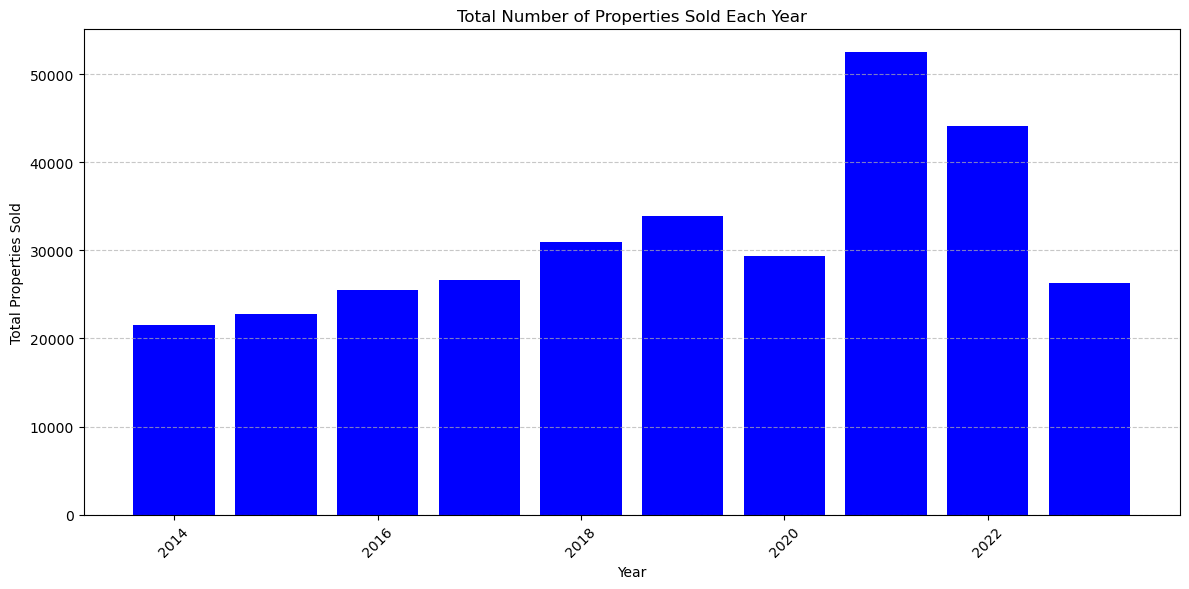

In [73]:

property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'])

property_df['sale_year'] = property_df['last_sold_date'].dt.year

properties_sold_each_year = property_df.groupby('sale_year').size().reset_index(name='total_properties_sold')

plt.figure(figsize=(12, 6))
plt.bar(properties_sold_each_year['sale_year'], properties_sold_each_year['total_properties_sold'], color='blue')
plt.title('Total Number of Properties Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Total Properties Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


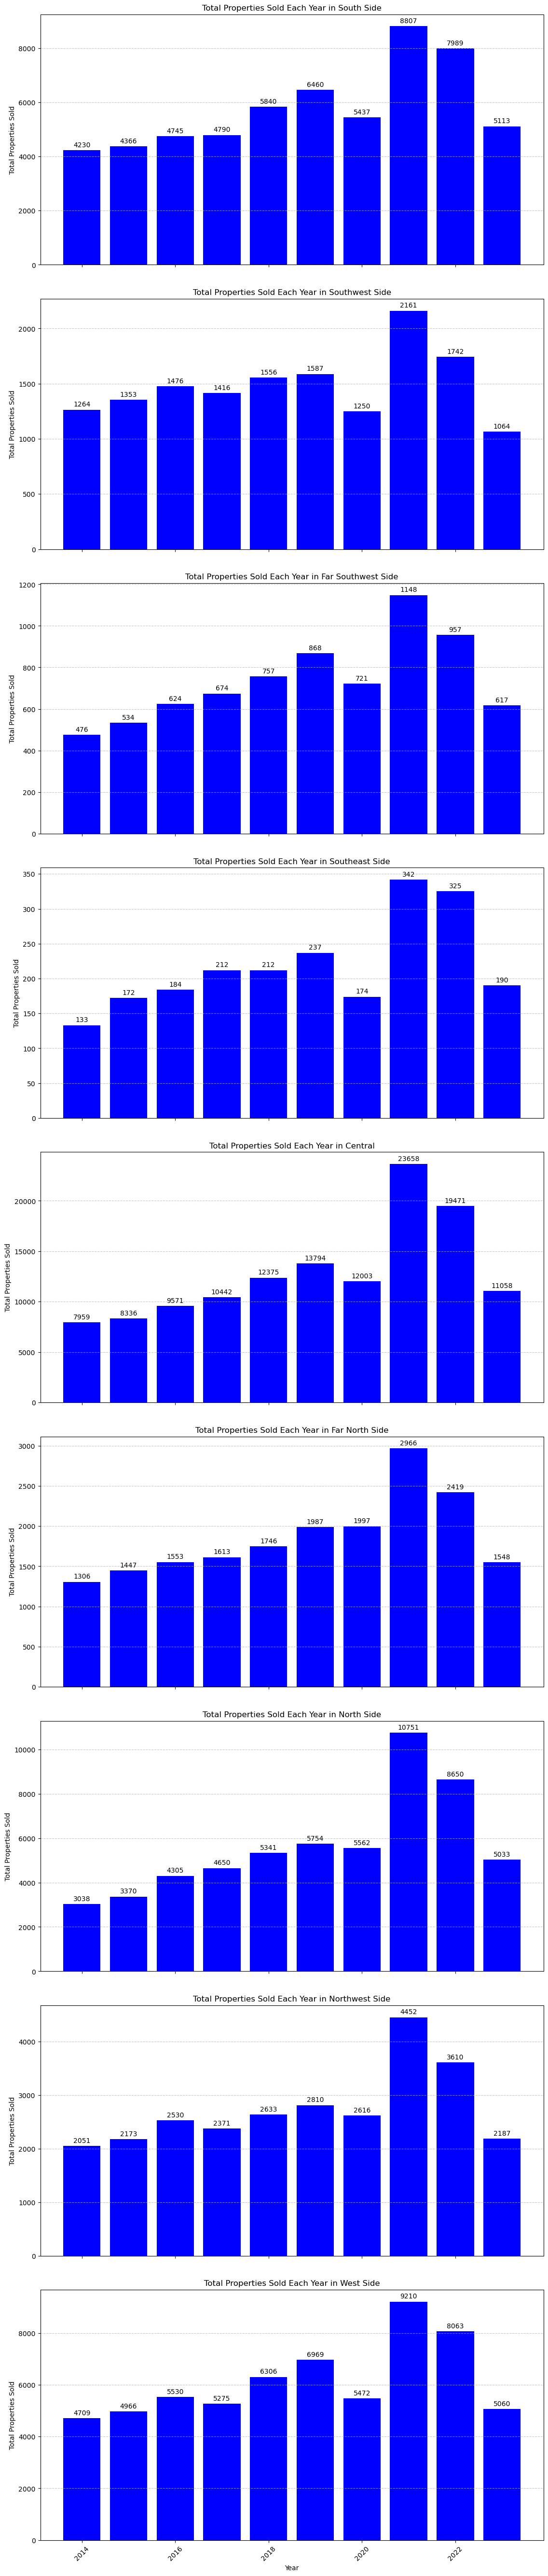

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'last_sold_date' is the column containing the sale date
# You may need to convert it to a datetime format if it's not already
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'])

# Extract the year from the 'last_sold_date' column
property_df['sale_year'] = property_df['last_sold_date'].dt.year

# Initialize an empty dictionary to store results for each neighborhood group
neighborhood_group_results = {}

# Iterate through each neighborhood group
for group_name, group_info in neighborhood_groups.items():
    neighborhoods = group_info['neighborhoods']
    
    # Filter the DataFrame for properties in the current neighborhood group
    group_data = property_df[property_df['community'].isin(neighborhoods)]
    
    # Group the filtered data by 'sale_year' and count the number of rows in each group
    properties_sold_each_year = group_data.groupby('sale_year').size().reset_index(name='total_properties_sold')
    
    # Store the result in the dictionary with the group name as the key
    neighborhood_group_results[group_name] = properties_sold_each_year

# Calculate the number of neighborhood groups
num_groups = len(neighborhood_group_results)

# Create subplots for each neighborhood group
fig, axs = plt.subplots(num_groups, 1, figsize=(12, 6 * num_groups), sharex=True)

# Iterate through the results and create a bar plot for each neighborhood group
for i, (group_name, result_df) in enumerate(neighborhood_group_results.items()):
    axs[i].bar(result_df['sale_year'], result_df['total_properties_sold'], color='blue')
    axs[i].set_title(f'Total Properties Sold Each Year in {group_name}')
    axs[i].set_ylabel('Total Properties Sold')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', labelrotation=45)
    
    # Add year labels to the bars
    for x, y in zip(result_df['sale_year'], result_df['total_properties_sold']):
        axs[i].annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
    
# Set common x-axis label
plt.xlabel('Year')

# Adjust spacing between subplots and add some margin
plt.tight_layout(pad=3.0)

# Display the plot
plt.show()


## Average, median, and range of sold prices per year

In [107]:
grouped_df = property_df.groupby(['neighborhood_group', 'year'])

stats_df = grouped_df['sold_price'].agg(['mean', 'median', lambda x: x.max() - x.min()])
stats_df.rename(columns={'mean': 'Average Sold Price', 'median': 'Median Sold Price', '<lambda_0>': 'Range of Sold Prices'}, inplace=True)

stats_df['Average Sold Price'] = stats_df['Average Sold Price'].apply(lambda x: f"${x:,.2f}")
stats_df['Median Sold Price'] = stats_df['Median Sold Price'].apply(lambda x: f"${x:,.2f}")
stats_df['Range of Sold Prices'] = stats_df['Range of Sold Prices'].apply(lambda x: f"${x:,.2f}")

stats_df.head(60)

Average Sold Price Median Sold Price  \
neighborhood_group year                                        
Central            2014      $9,160,005.51       $400,000.00   
                   2015      $2,716,888.15       $405,000.00   
                   2016        $894,509.38       $416,000.00   
                   2017        $689,303.56       $420,000.00   
                   2018        $718,526.87       $420,000.00   
                   2019        $844,381.89       $420,000.00   
                   2020        $681,256.74       $443,000.00   
                   2021        $641,660.92       $450,000.00   
                   2022        $910,719.16       $465,000.00   
                   2023        $669,355.72       $452,250.00   
Far North Side     2014        $275,752.70       $236,000.00   
                   2015        $312,732.43       $263,000.00   
                   2016        $350,067.76       $270,000.00   
                   2017        $316,916.82       $277,500.00   
                   2018        $319,218.61       $280,000.00   
                   2019        $327,486.46       $282,807.00   
                   2020        $362,782.51       $315,000.00   
                   2021        $360,259.32       $320,000.00   
                   2022        $384,793.94       $325,000.00   
                   2023        $381,176.62       $332,220.50   
Far Southwest Side 2014        $198,335.06       $166,000.00   
                   2015        $207,107.37       $180,000.00   
                   2016        $243,519.23       $194,500.00   
                   2017        $221,272.37       $190,000.00   
                   2018        $276,442.52       $206,500.00   
                   2019        $313,018.31       $227,000.00   
                   2020        $274,508.85       $244,000.00   
                   2021        $313,246.04       $284,500.00   
                   2022        $320,735.35       $277,750.00   
                   2023        $312,309.56       $264,000.00   
North Side         2014        $539,778.83       $365,000.00   
                   2015        $575,523.38       $357,500.00   
                   2016      $2,214,850.41       $375,000.00   
                   2017        $565,977.32       $358,000.00   
                   2018        $542,091.24       $365,000.00   
                   2019        $587,387.47       $379,000.00   
                   2020        $624,452.46       $425,000.00   
                   2021        $609,001.85       $425,000.00   
                   2022        $637,414.34       $440,000.00   
                   2023        $616,097.80       $435,000.00   
Northwest Side     2014        $282,197.29       $245,000.00   
                   2015        $317,654.07       $274,000.00   
                   2016        $405,246.91       $295,000.00   
                   2017        $333,584.26       $300,000.00   
                   2018        $350,605.60       $310,000.00   
                   2019        $357,676.53       $315,000.00   
                   2020        $375,547.25       $331,500.00   
                   2021        $413,331.64       $355,000.00   
                   2022        $485,397.43       $383,000.00   
                   2023        $415,632.01       $366,050.00   
Other              2014        $627,382.94       $377,750.00   
                   2015        $449,248.78       $350,000.00   
                   2016        $679,974.41       $365,000.00   
                   2017      $5,189,566.35       $387,000.00   
                   2018        $532,416.84       $360,000.00   
                   2019        $449,157.37       $361,250.00   
                   2020        $531,139.82       $372,000.00   
                   2021        $464,054.43       $365,777.50   
                   2022        $499,749.52       $365,000.00   
                   2023        $491,698.82       $387,750.00   

                        Range of Sold Prices  
neighbor

## Analysis of market trends: periods of growth and decline

# Property Type Analysis

## Distribution of property types (single-family, multi-fam etc.)

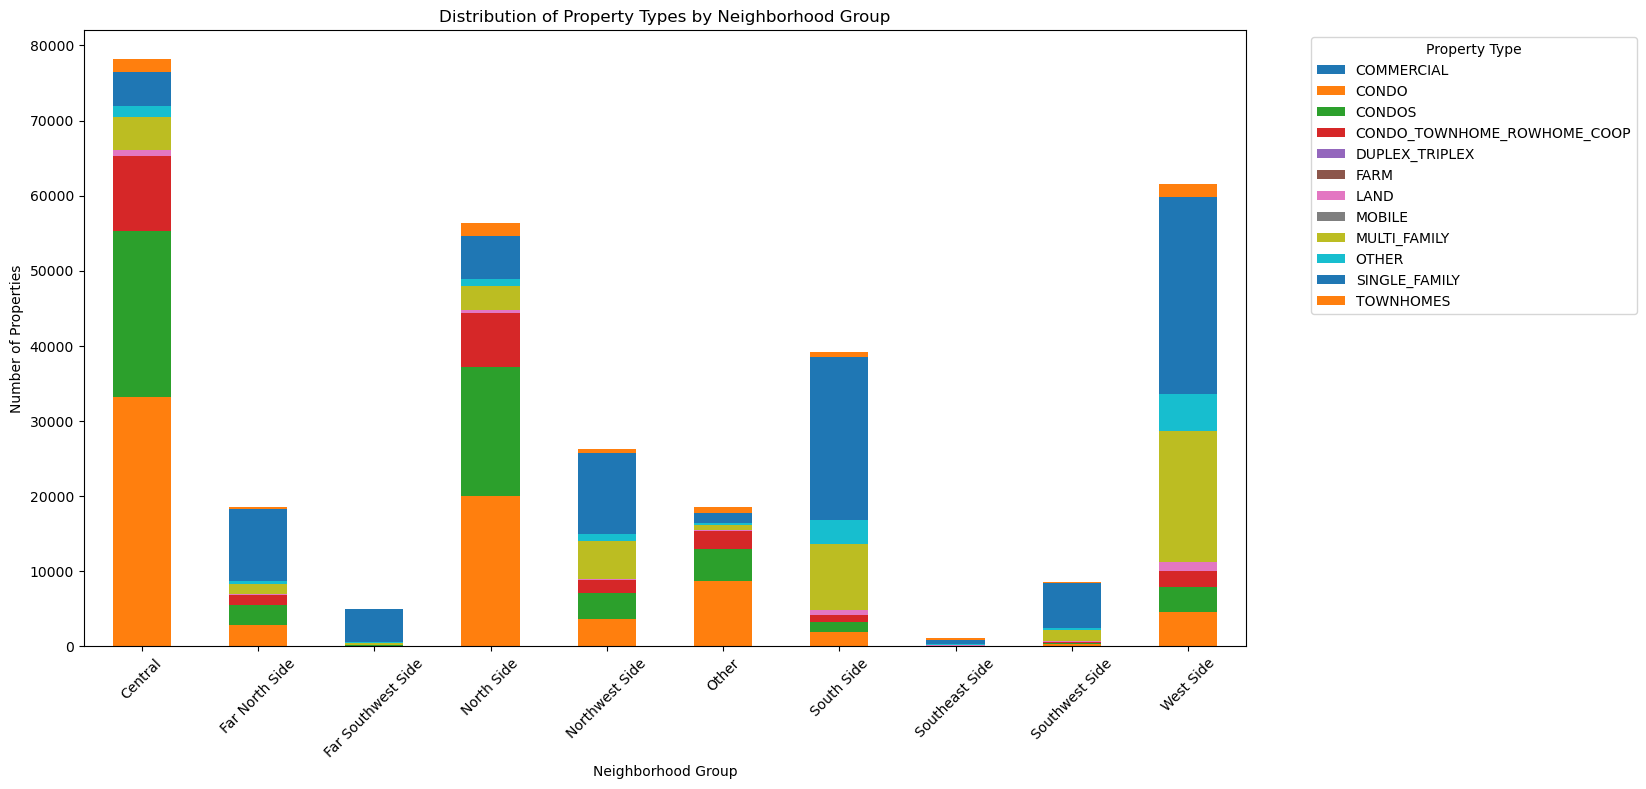

In [108]:
property_type_counts = property_df.groupby('neighborhood_group')['style'].value_counts().unstack(fill_value=0)

property_type_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Property Types by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Average and meidan prices for each property type

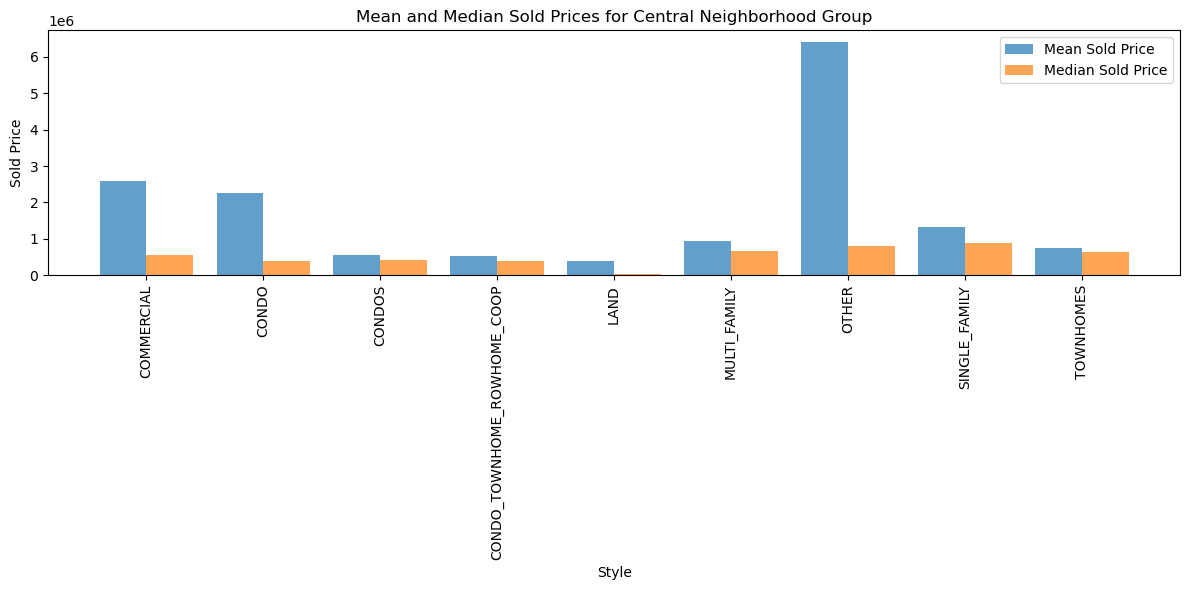

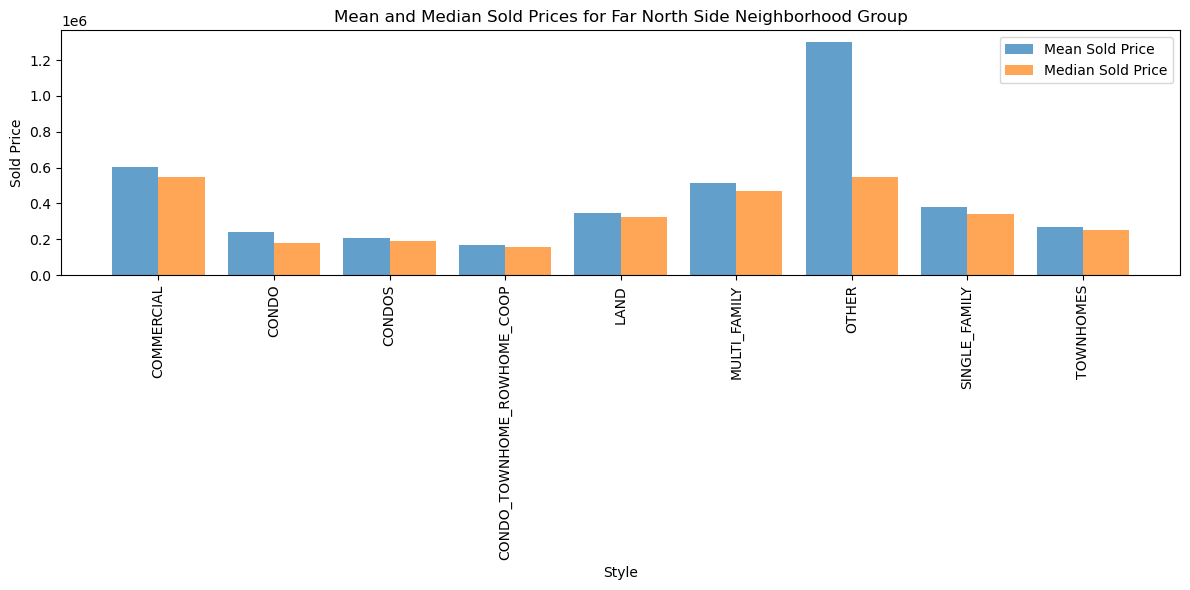

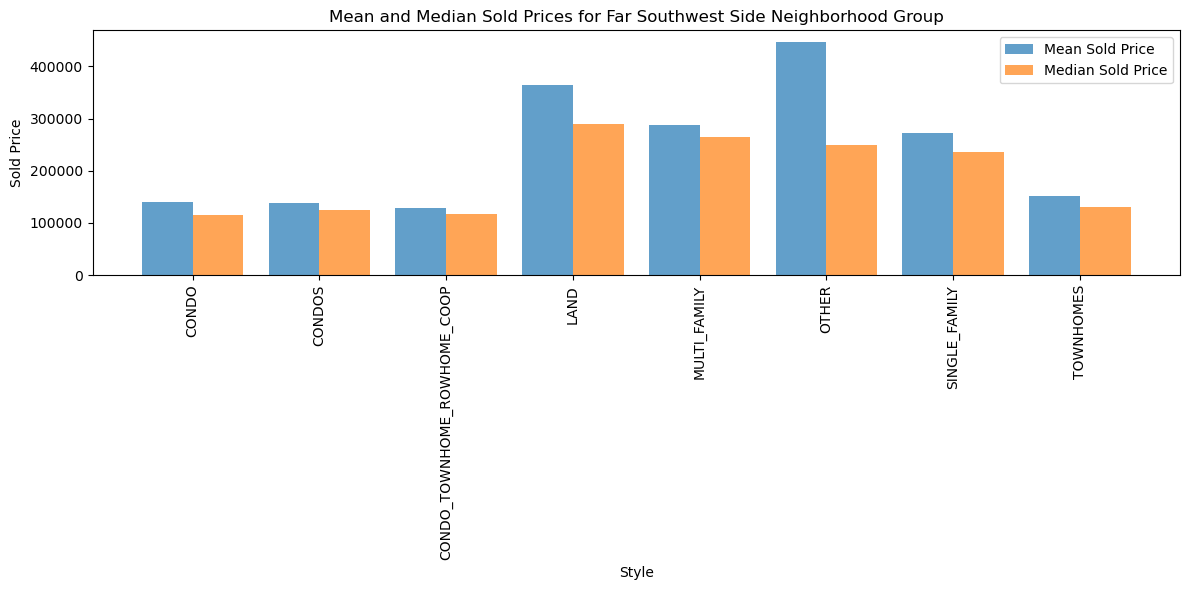

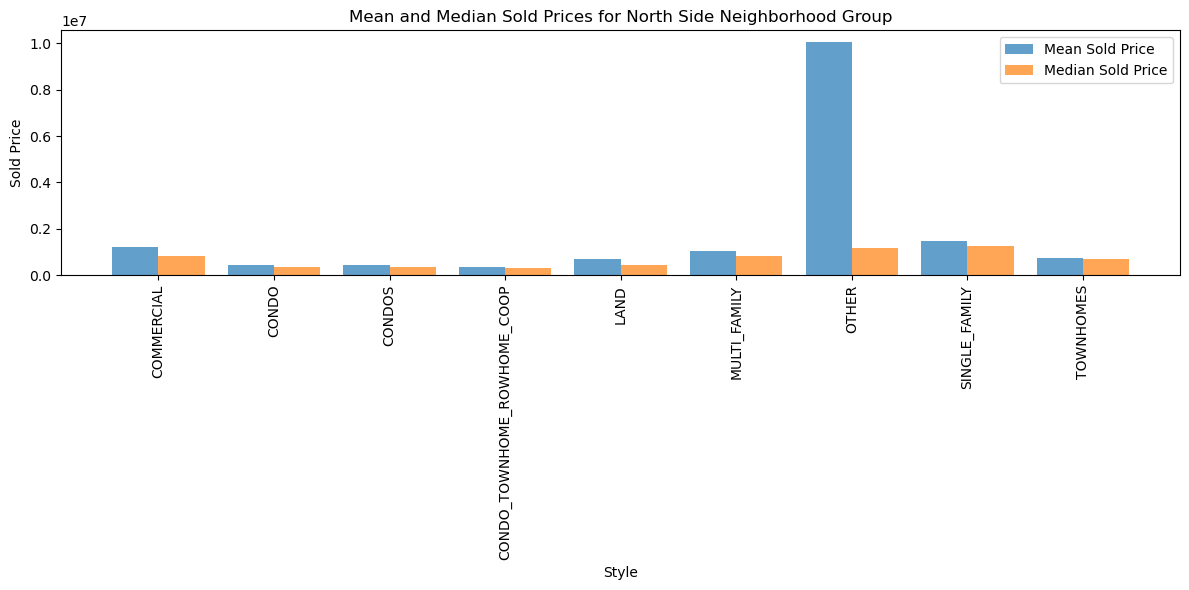

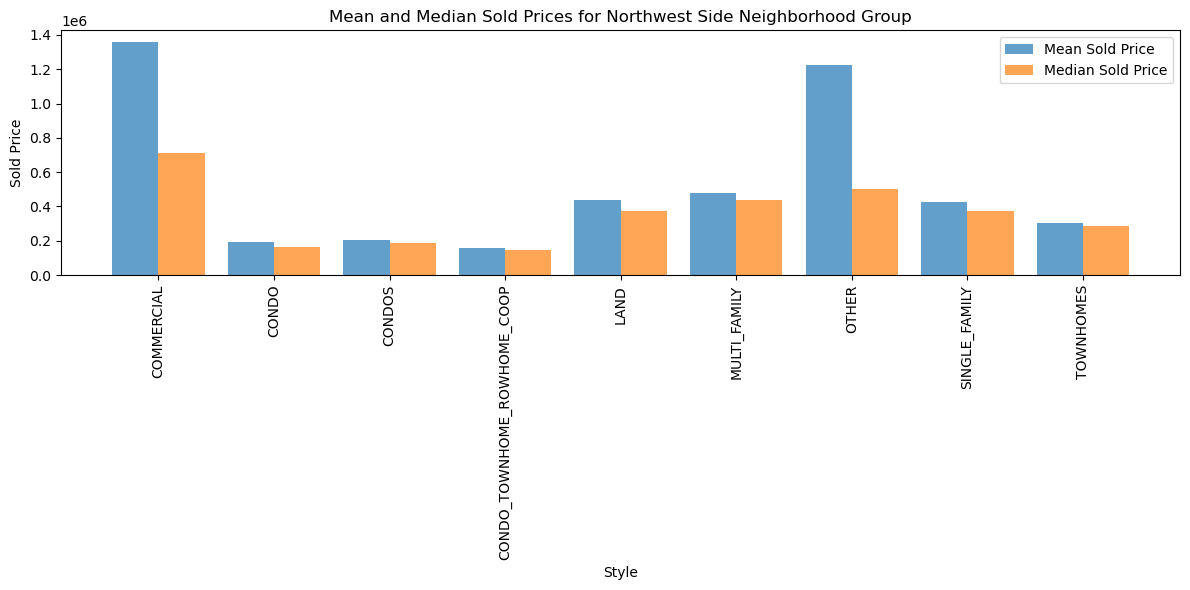

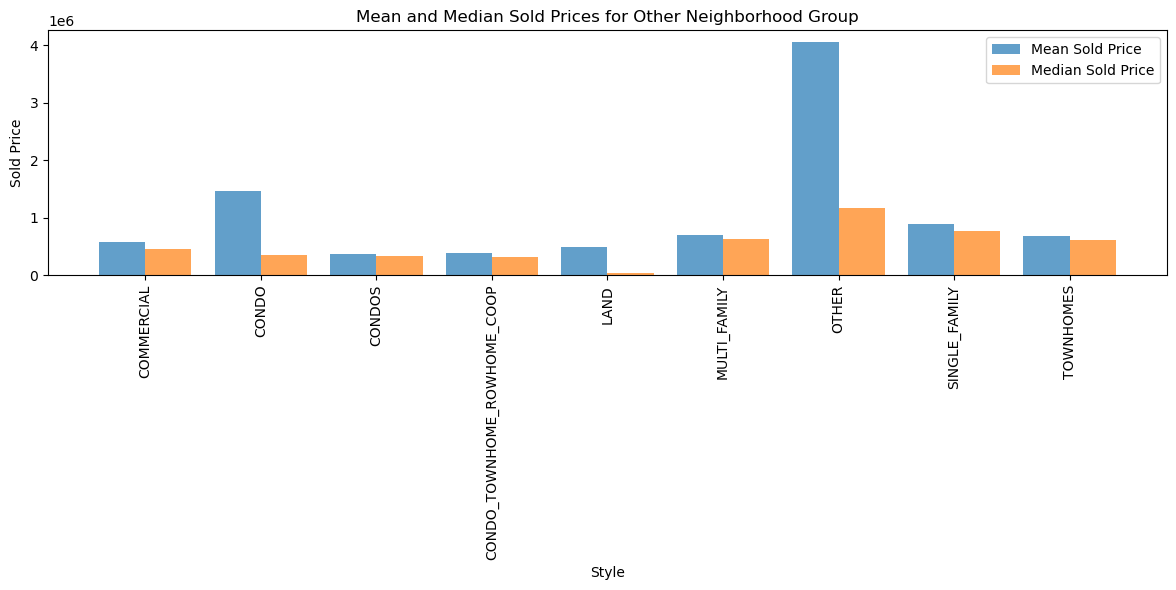

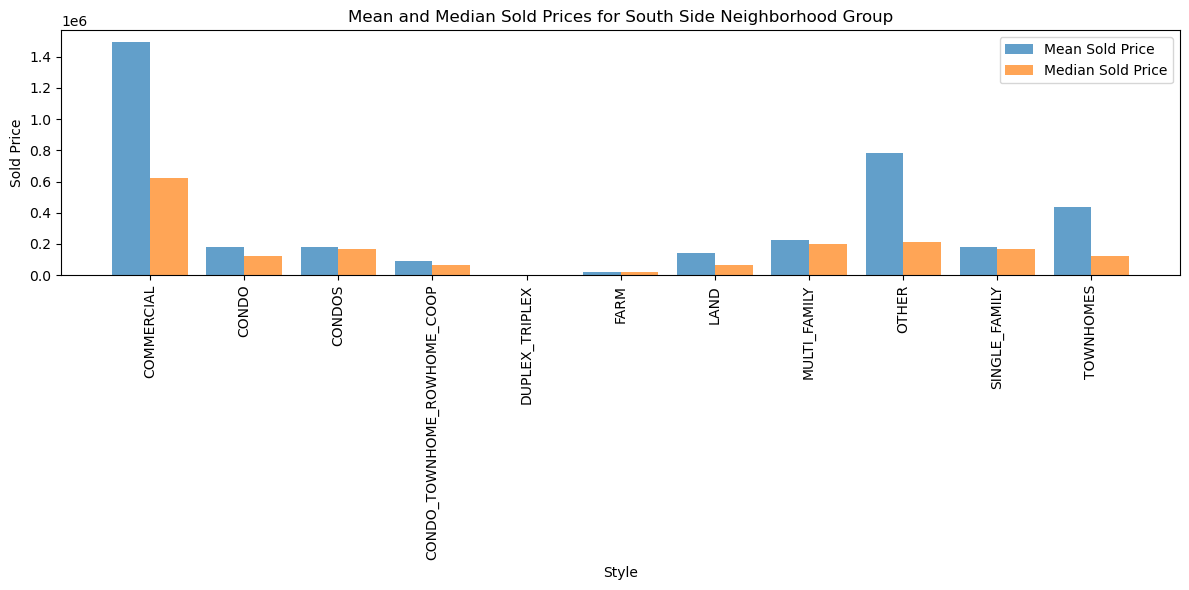

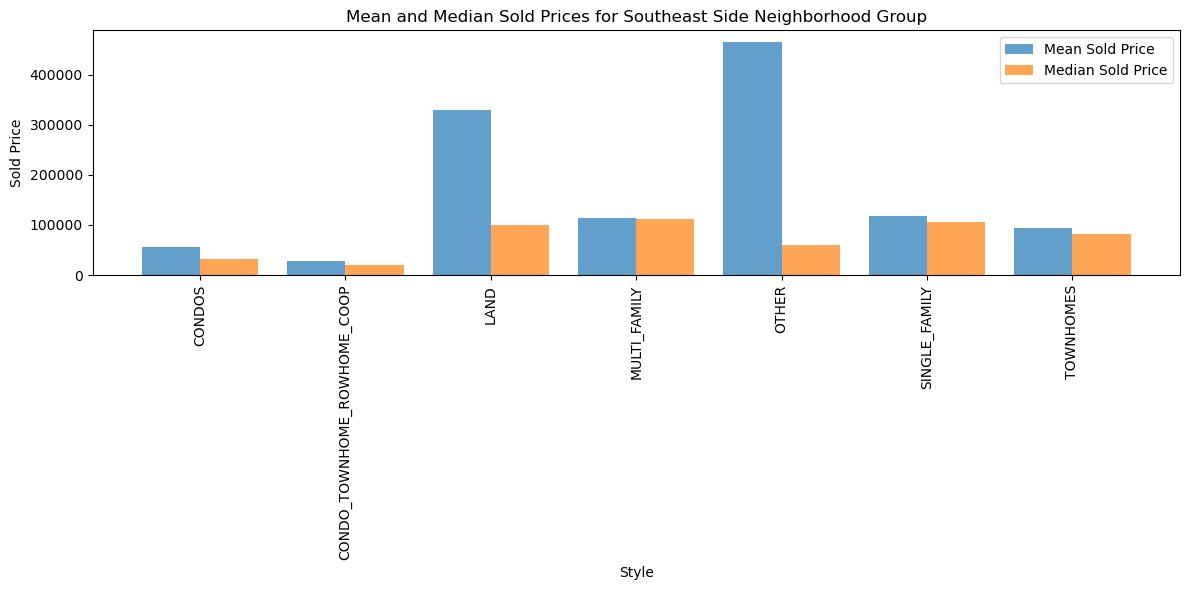

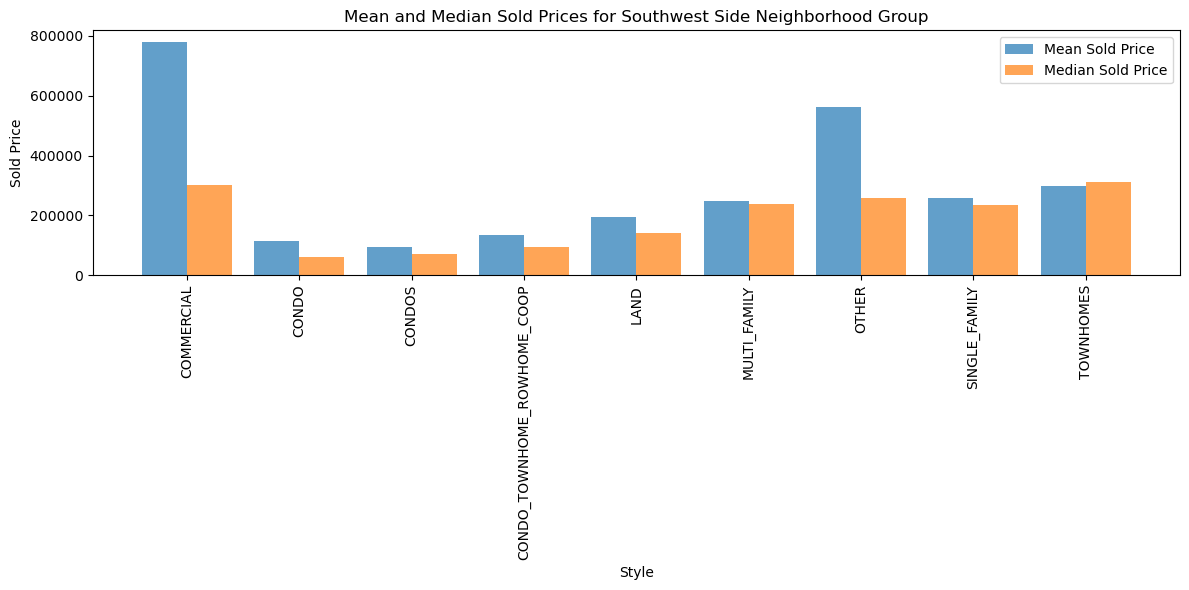

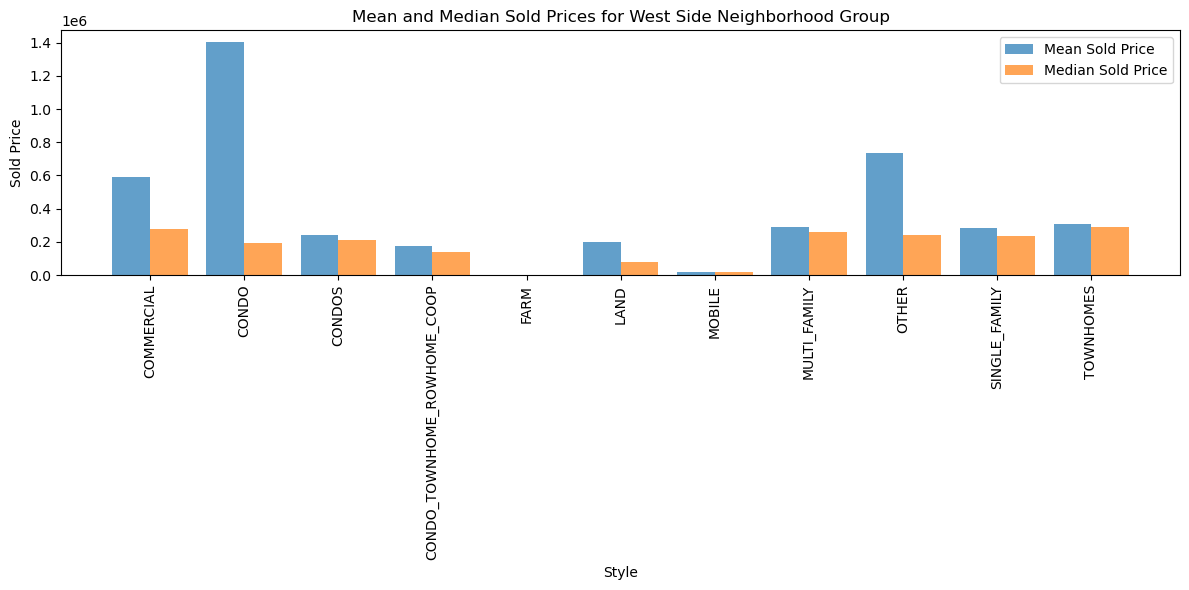

In [111]:
grouped_df = property_df.groupby(['neighborhood_group', 'style'])

price_stats = grouped_df['sold_price'].agg(['mean', 'median'])

price_stats_reset = price_stats.reset_index()

neighborhood_groups = price_stats_reset['neighborhood_group'].unique()

for group in neighborhood_groups:
    group_data = price_stats_reset[price_stats_reset['neighborhood_group'] == group]
    
    plt.figure(figsize=(12, 6))
    plt.bar(group_data.index, group_data['mean'], width=0.4, label='Mean Sold Price', align='center', alpha=0.7)
    plt.bar(group_data.index + 0.4, group_data['median'], width=0.4, label='Median Sold Price', align='center', alpha=0.7)
    plt.xlabel('Style')
    plt.ylabel('Sold Price')
    plt.xticks(group_data.index + 0.2, group_data['style'], rotation=90)
    plt.legend()
    plt.title(f'Mean and Median Sold Prices for {group} Neighborhood Group')
    plt.tight_layout()
    plt.show()



## Comparison of size and price across property type

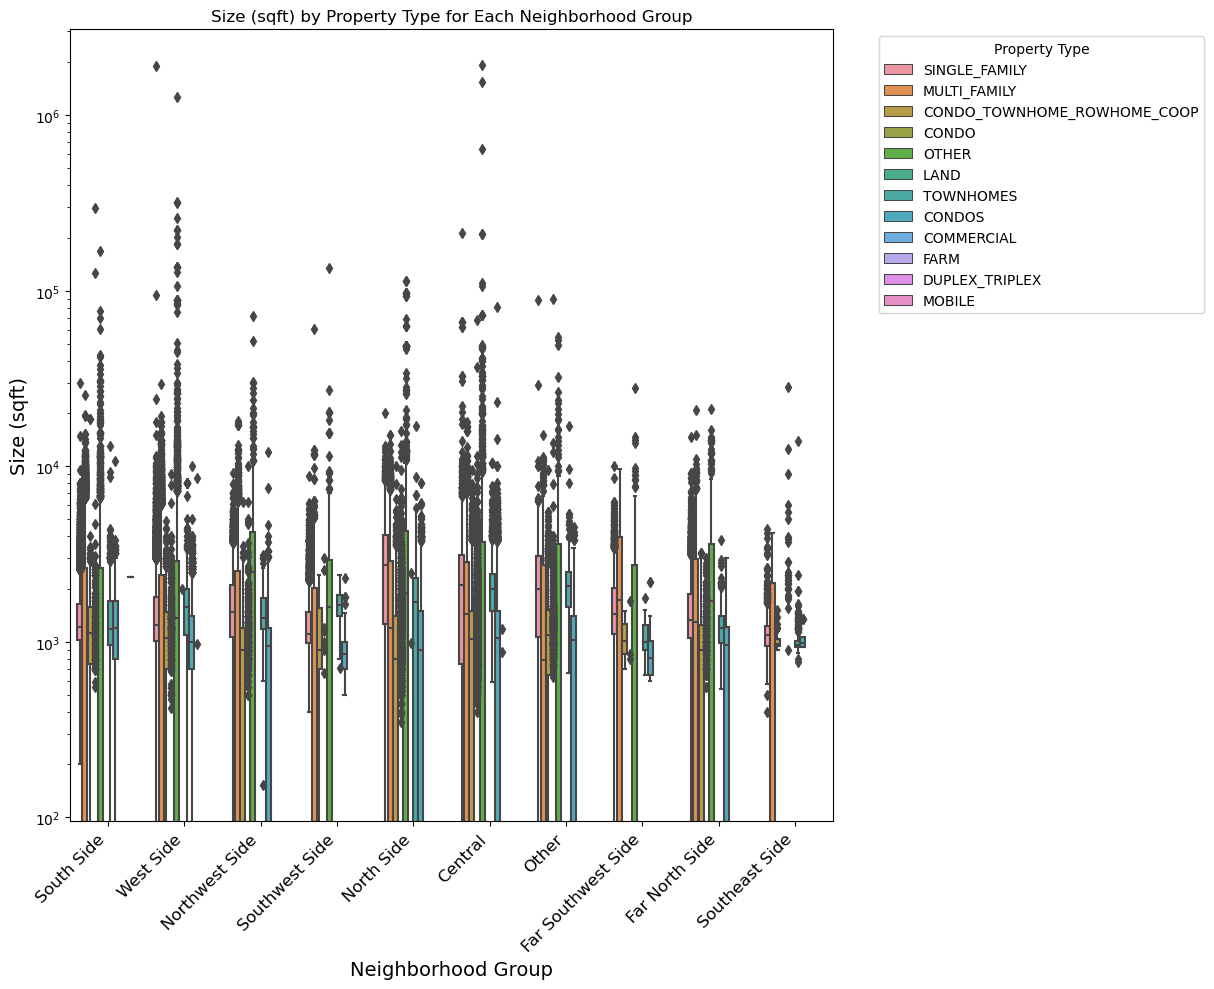

In [118]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=property_df, x='neighborhood_group', y='sqft', hue='style')
plt.title('Size (sqft) by Property Type for Each Neighborhood Group')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Size (sqft)',fontsize=14)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.yscale('log')

plt.tight_layout()
plt.show()

## Trend analysis for each property type over the years

In [ ]:
## PERCENT CHANGE OF PROPERTY STYLE FOR EACH YEAR COMPARED TO PREVIOUS YEAR 

selected_neighborhoods = []
for group_info in neighborhood_groups.values():
    selected_neighborhoods.extend(group_info['neighborhoods'])

filtered_data = property_df[
    (property_df['list_date'].dt.year >= 2014) &
    (property_df['list_date'].dt.year <= 2023) &
    (property_df['community'].isin(selected_neighborhoods))
]

style_counts = {group_name: {} for group_name in neighborhood_groups.keys()}

for group_name, group_info in neighborhood_groups.items():
    neighborhoods = group_info['neighborhoods']

    group_data = filtered_data[filtered_data['community'].isin(neighborhoods)]

    style_counts[group_name] = group_data.groupby([group_data['list_date'].dt.year, 'style'])['style'].count()

style_counts_df = pd.concat(style_counts).unstack().fillna(0)

percent_change_df = style_counts_df.pct_change(fill_method=None) * 100

percent_change_table = percent_change_df.to_string(float_format="{:.1f}".format)

print(percent_change_table)



style                         COMMERCIAL  CONDO  CONDOS  CONDO_TOWNHOME_ROWHOME_COOP  DUPLEX_TRIPLEX   FARM   LAND  MOBILE  MULTI_FAMILY   OTHER  SINGLE_FAMILY  TOWNHOMES
                   list_date                                                                                                                                              
South Side         2014              NaN    NaN     NaN                          NaN             NaN    NaN    NaN     NaN           NaN     NaN            NaN        NaN
                   2015              0.0    6.7    50.0                        -23.8             NaN    NaN  -19.4     NaN          -5.9    20.8            8.4       39.6
                   2016           -100.0    7.9   -33.3                         11.3             NaN    NaN  -11.1     NaN          19.9     9.5            5.9       -9.5
                   2017              inf   48.0   -50.0                        -54.6             NaN    NaN   10.4     NaN         -10.1    33.1 

Here are some observations of some noticeable trends in property style preferences in different neighborhoods and years:

1.  Variability: There is significant variability in property style preferences from year to year in most neighborhoods. Some years show substantial increases or decreases in particular property styles.

2.  Differences Between Neighborhoods: Different neighborhoods have different patterns of property style preferences. For example, the "Far Southwest Side" neighborhood shows a substantial increase in "MOBILE" style properties in 2019 and 2020, while the "Northwest Side" neighborhood experiences a sharp increase in "CONDO" style properties in 2016.

3.  Outliers: Some neighborhoods have extreme outliers or spikes in certain property styles. For instance, "South Side" in 2017 has an unusually high increase in "SINGLE_FAMILY" properties. These outliers may be due to specific events or unique circumstances in those years.

4.  Stability: In some neighborhoods, certain property styles remain relatively stable over the years. For instance, "MOBILE" style properties in "North Side" and "West Side" have relatively stable trends with small fluctuations.

5.  Trends Over Time: Overall, it seems that property styles like "CONDO" and "TOWNHOMES" have seen fluctuations in popularity over the years, while "SINGLE_FAMILY" properties tend to be more consistent or show gradual changes.

6.  Extreme Percentage Changes: Extreme percentage changes, such as those exceeding 1000%, may be outliers or data anomalies needing further investigation to such extreme further to determine their validity.

It's important to note that property style preferences can be influenced by various factors, including economic conditions, market trends, and demographic shifts. Analyzing these trends in conjunction with external factors may provide more insights into the underlying reasons for these patterns.

To make more concrete conclusions or recommendations, it is necessary to delve deeper into the data and consider additional factors that could explain these trends. Additionally, consulting domain experts in real estate or conducting further statistical analysis could provide valuable insights into the observed patterns.

# Price Trends Over Time

## Avg sold price & price change % for each year

In [ ]:
average_price_yearly = property_df.groupby(['community', 'year'])['sold_price'].mean().unstack()

price_change_yearly = property_df.groupby(['community', 'year']).agg({
    'sold_price': lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100  # Price change for the year (%)
}).unstack()

average_price_yearly.columns = [f'avg_price_{year}' for year in average_price_yearly.columns]
price_change_yearly.columns = [f'price_change_{year}' for year in price_change_yearly.columns]

result_df = average_price_yearly.merge(price_change_yearly, on='community')

result_df.head()



,avg_price_2014,avg_price_2015,avg_price_2016,avg_price_2017,avg_price_2018,avg_price_2019,avg_price_2020,avg_price_2021,avg_price_2022,avg_price_2023,"price_change_('sold_price', 2014)","price_change_('sold_price', 2015)","price_change_('sold_price', 2016)","price_change_('sold_price', 2017)","price_change_('sold_price', 2018)","price_change_('sold_price', 2019)","price_change_('sold_price', 2020)","price_change_('sold_price', 2021)","price_change_('sold_price', 2022)","price_change_('sold_price', 2023)"
community,,,,,,,,,,,,,,,,,,,,
ALBANY PARK,291891.128302,360598.351974,523354.692529,340484.447183,354433.580645,369179.360231,386621.168508,401316.166667,430245.582822,427125.560372,36.428571,200.575013,-5.172414,-36.756757,23.890411,65.845649,-17.333333,357.831325,138.663484,-6.349206
ARCHER HEIGHTS,166858.764151,179038.102804,230667.878788,214740.000000,220601.500000,464738.917526,276739.506173,283008.000000,301860.453488,302343.245902,521.212121,23.579545,-3.030303,-25.862069,-22.727273,-10.800000,14.018692,24.528302,-25.170068,36.363636
ARMOUR SQUARE,306210.869565,307121.917808,330966.056818,348045.454545,364435.848485,365698.238095,358401.724138,489899.826667,439052.083333,511964.406780,17.209302,92.066667,69.669670,37.254902,73.529412,22.812727,12.258065,-56.000000,-17.105263,53.703704
ASHBURN,141039.031348,178192.660057,186627.771277,196428.480488,207252.065728,208830.758621,222116.349673,242971.902527,298922.466200,317012.614841,33.333333,87.500000,-9.189189,1.395349,8.196721,-10.132159,-31.872320,2.564103,87.555556,54.666667
AUBURN GRESHAM,107548.359833,112875.848889,142303.235088,141617.468310,165708.688172,187006.526196,220107.673418,271001.046263,369991.275605,227810.048593,137.321516,415.625000,0.793651,22.727273,490.666667,12.121212,228.571429,54.545455,-30.312500,30.054645


## Yearly average and median price trends

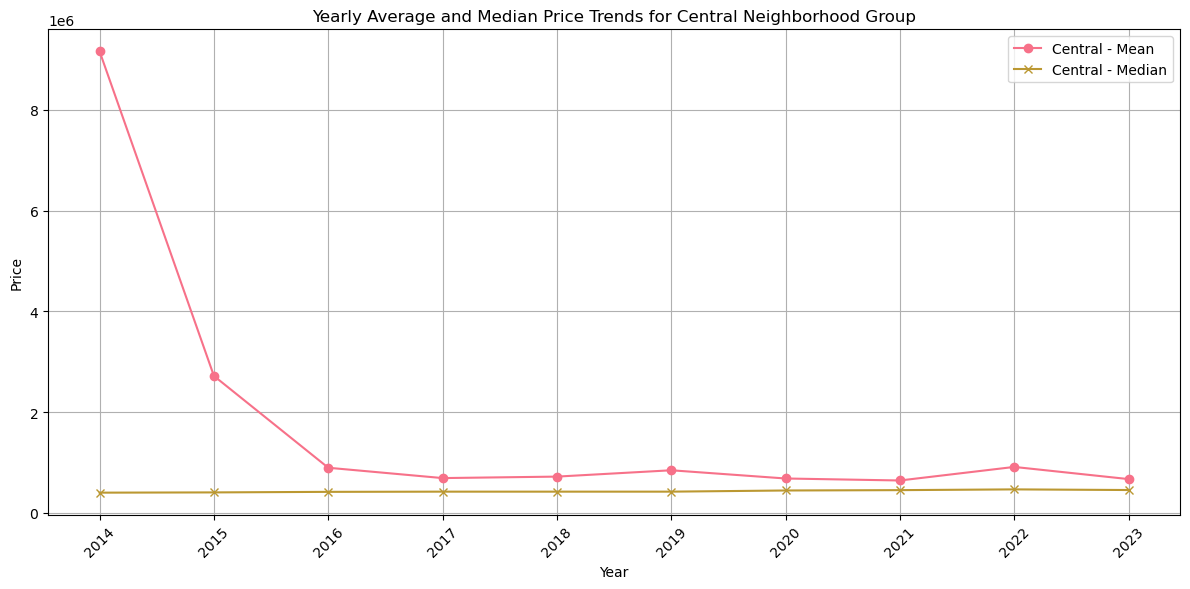

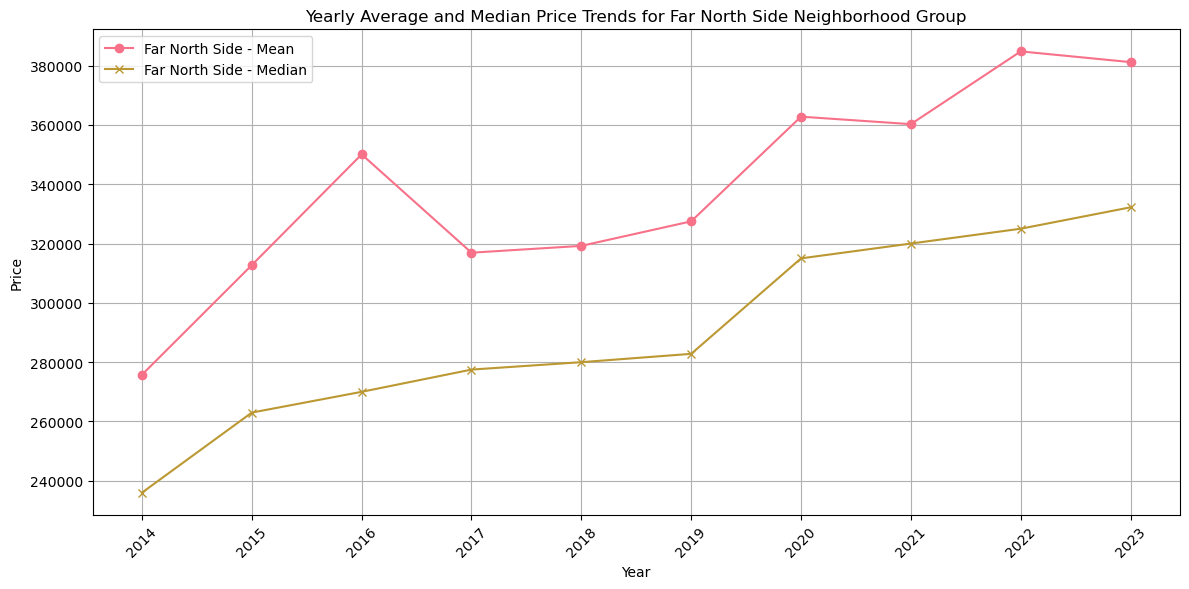

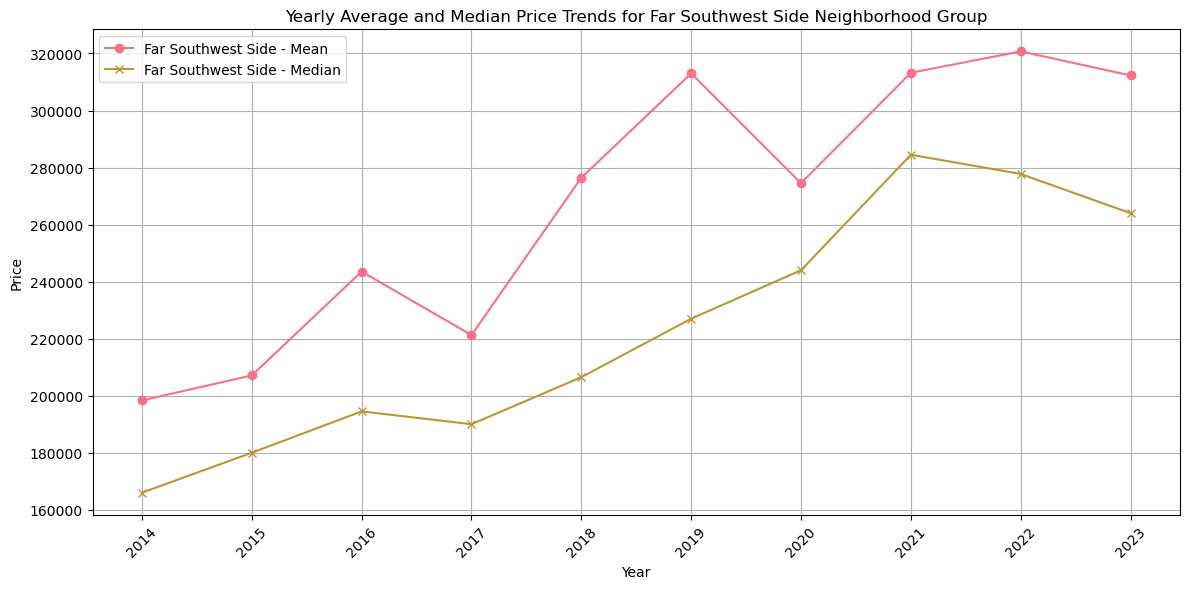

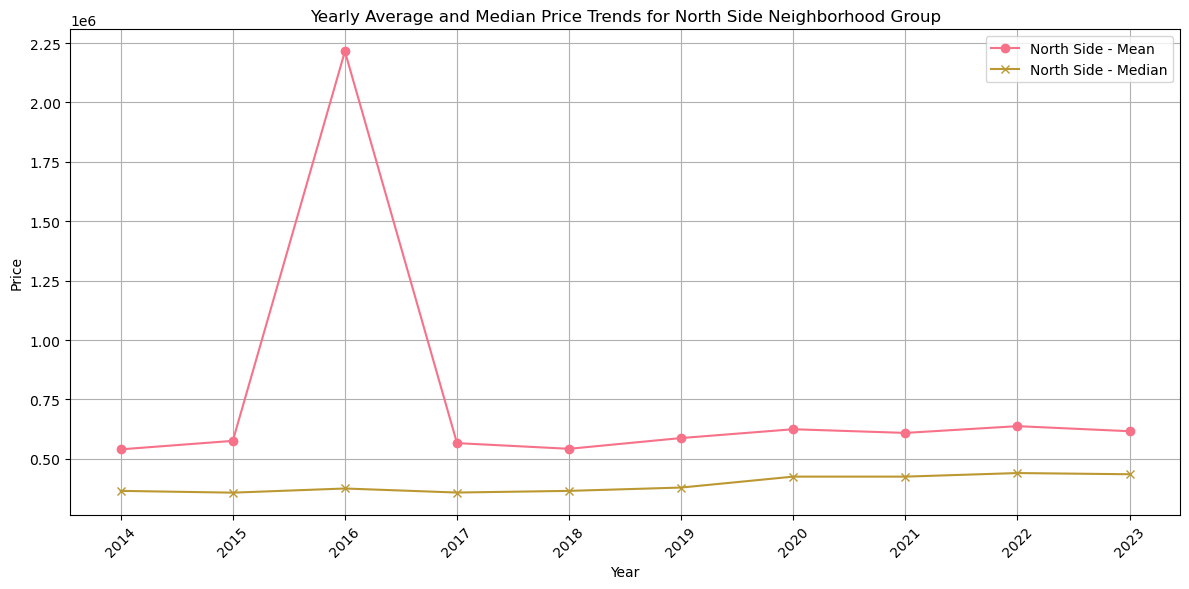

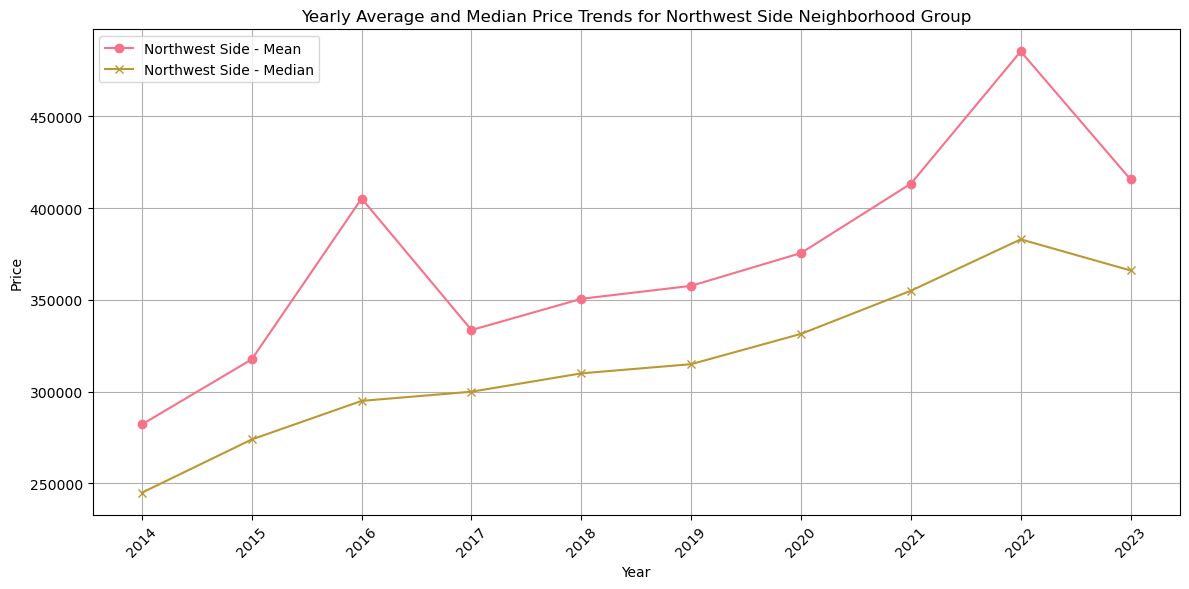

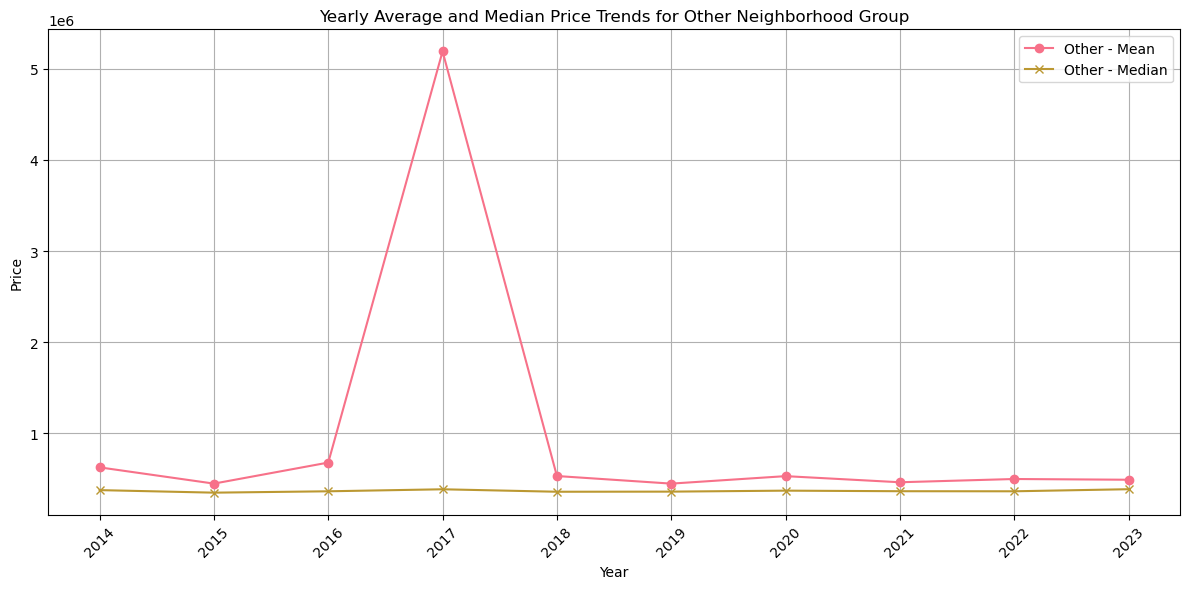

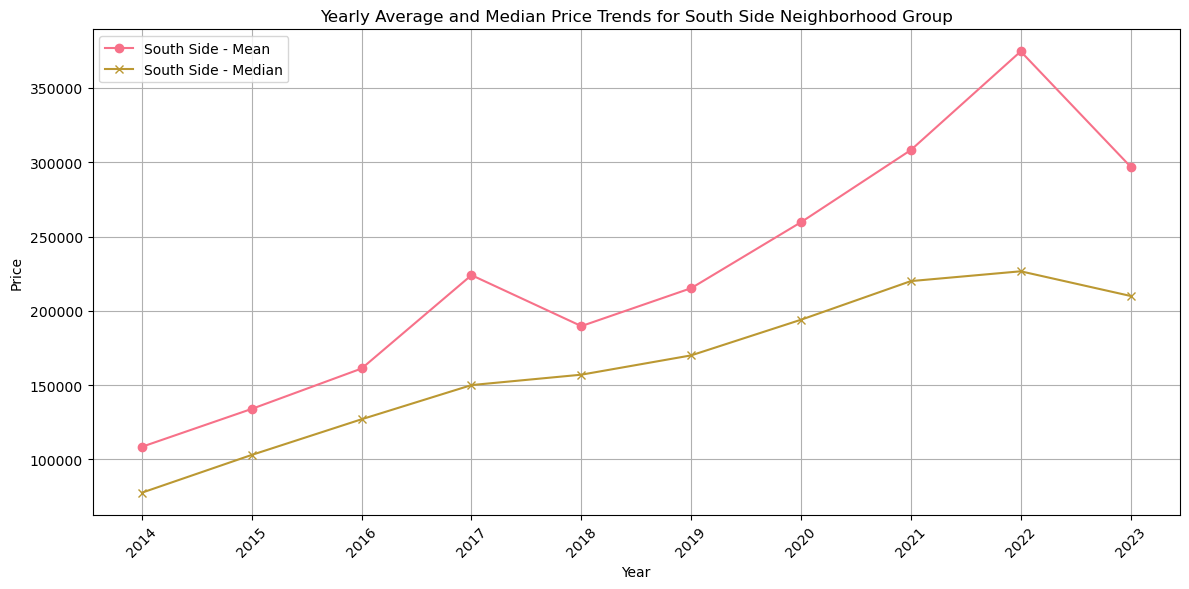

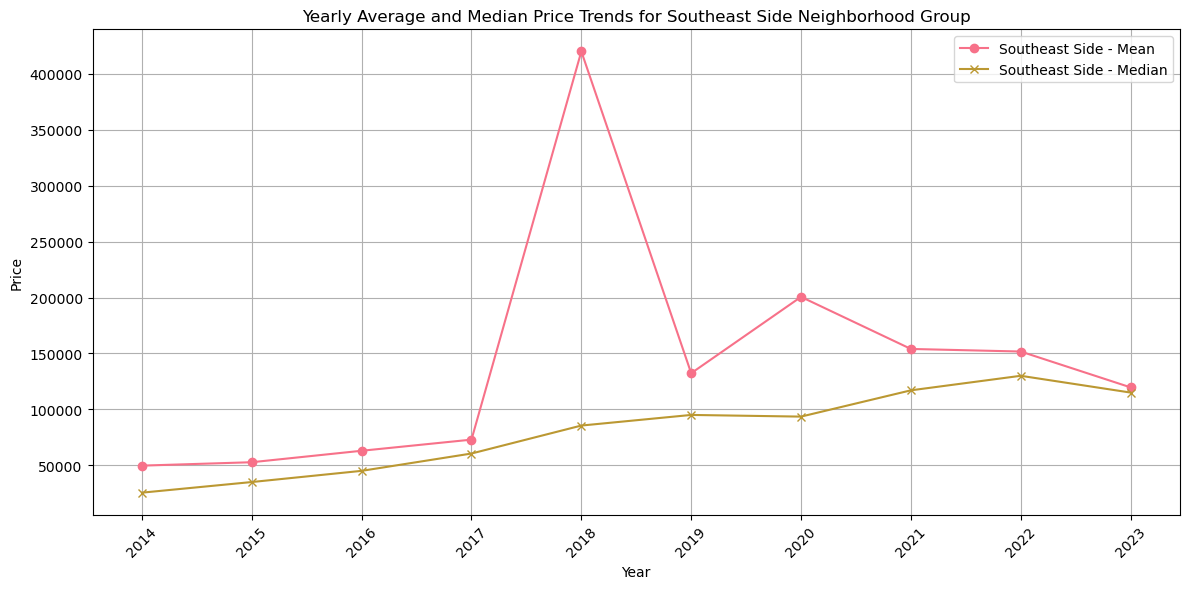

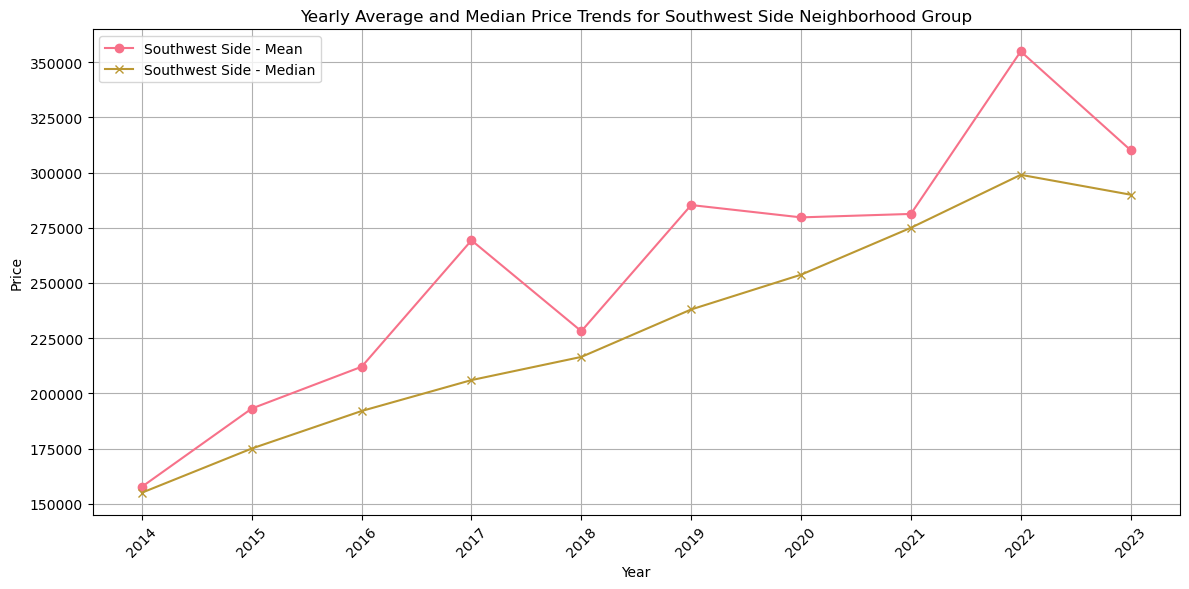

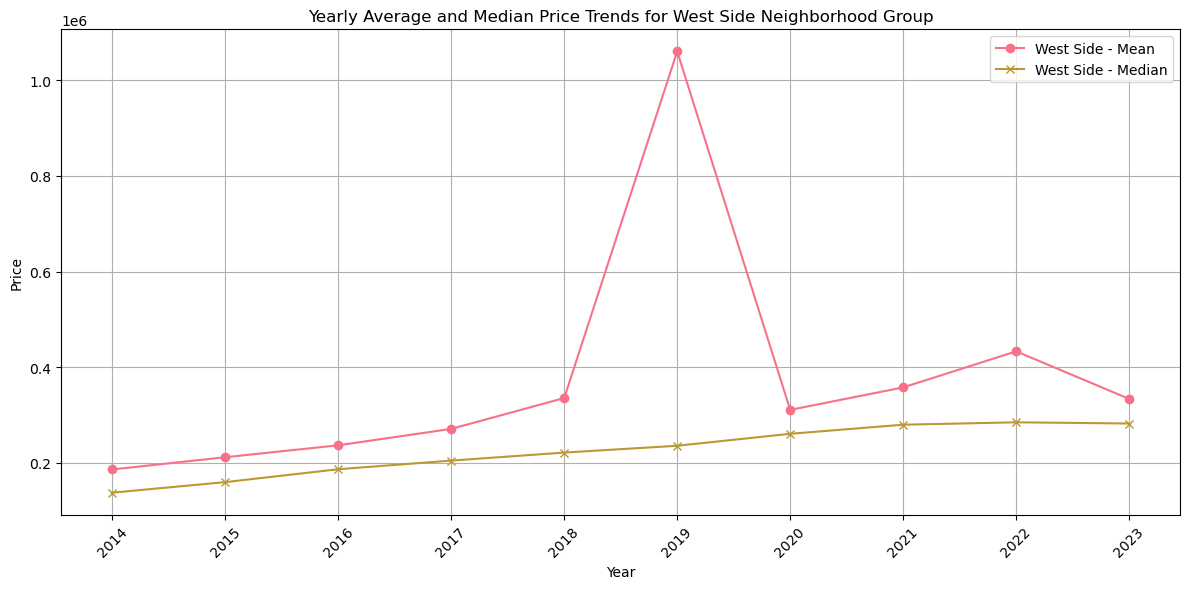

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract the year from the 'last_sold_date' column
property_df['year'] = pd.to_datetime(property_df['last_sold_date']).dt.year

# Step 2: Group the data by 'neighborhood_group', 'year', and calculate mean and median 'sold_price'
grouped_data = property_df.groupby(['neighborhood_group', 'year'])['sold_price'].agg(['mean', 'median']).reset_index()

# Step 3: Create individual line plots for each neighborhood group
neighborhood_groups = grouped_data['neighborhood_group'].unique()

for group in neighborhood_groups:
    group_data = grouped_data[grouped_data['neighborhood_group'] == group]
    plt.figure(figsize=(12, 6))
    sns.set_palette("husl")  # Set a color palette for the lines
    
    # Create line plot for mean sold price
    plt.plot(group_data['year'], group_data['mean'], label=f'{group} - Mean', marker='o')
    
    # Create line plot for median sold price
    plt.plot(group_data['year'], group_data['median'], label=f'{group} - Median', marker='x')
    
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title(f'Yearly Average and Median Price Trends for {group} Neighborhood Group')
    plt.xticks(group_data['year'].unique(), rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



## Comparison of price growth rates among different property types

In [124]:
property_df['year'] = pd.to_datetime(property_df['last_sold_date']).dt.year

grouped_data = property_df.groupby(['style', 'year'])['sold_price'].mean().reset_index()

grouped_data['price_growth_rate'] = grouped_data.groupby('style')['sold_price'].pct_change() * 100

pd.set_option('display.max_rows', None)

print(grouped_data[['style', 'year', 'price_growth_rate']])


                          style  year  price_growth_rate
0                    COMMERCIAL  2014                NaN
1                    COMMERCIAL  2015          37.081702
2                    COMMERCIAL  2016          48.861736
3                    COMMERCIAL  2017         -69.725246
4                    COMMERCIAL  2018         426.078767
5                    COMMERCIAL  2019         -59.696945
6                    COMMERCIAL  2020           2.606076
7                    COMMERCIAL  2021         -21.206499
8                    COMMERCIAL  2022         -35.605950
9                    COMMERCIAL  2023         -14.059286
10                        CONDO  2014                NaN
11                        CONDO  2015         -78.068464
12                        CONDO  2016         -74.793862
13                        CONDO  2017         156.655705
14                        CONDO  2018         -66.220756
15                        CONDO  2019         196.686192
16                        CONDO

In [126]:
property_df['year'] = pd.to_datetime(property_df['last_sold_date']).dt.year

grouped_data = property_df.groupby(['neighborhood_group', 'style', 'year'])['sold_price'].mean().reset_index()

grouped_data['price_growth_rate'] = grouped_data.groupby(['neighborhood_group', 'style'])['sold_price'].pct_change() * 100

pd.set_option('display.max_rows', None)

print(grouped_data[['neighborhood_group', 'style', 'year', 'price_growth_rate']])


     neighborhood_group                        style  year  price_growth_rate
0               Central                   COMMERCIAL  2015                NaN
1               Central                   COMMERCIAL  2016         395.238095
2               Central                   COMMERCIAL  2018         166.903846
3               Central                   COMMERCIAL  2019         -85.589740
4               Central                   COMMERCIAL  2020           5.975000
5               Central                   COMMERCIAL  2021         -74.522293
6               Central                   COMMERCIAL  2022         151.851852
7               Central                        CONDO  2014                NaN
8               Central                        CONDO  2015         -77.922239
9               Central                        CONDO  2016         -82.073751
10              Central                        CONDO  2017         -27.074268
11              Central                        CONDO  2018      

In [125]:
property_df['year'] = pd.to_datetime(property_df['last_sold_date']).dt.year

grouped_data = property_df.groupby(['neighborhood_group', 'style', 'year'])['sold_price'].mean().reset_index()

grouped_data['price_growth_rate'] = grouped_data.groupby(['neighborhood_group', 'style'])['sold_price'].pct_change() * 100

pd.set_option('display.max_rows', None)

print(grouped_data[['neighborhood_group', 'style', 'year', 'price_growth_rate']])


     neighborhood_group                        style  year  price_growth_rate
0               Central                   COMMERCIAL  2015                NaN
1               Central                   COMMERCIAL  2016         395.238095
2               Central                   COMMERCIAL  2018         166.903846
3               Central                   COMMERCIAL  2019         -85.589740
4               Central                   COMMERCIAL  2020           5.975000
5               Central                   COMMERCIAL  2021         -74.522293
6               Central                   COMMERCIAL  2022         151.851852
7               Central                        CONDO  2014                NaN
8               Central                        CONDO  2015         -77.922239
9               Central                        CONDO  2016         -82.073751
10              Central                        CONDO  2017         -27.074268
11              Central                        CONDO  2018      

# Geographical Analysis

#### Most active markets

In [30]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'])

grouped_data = property_df.groupby('community')

sold_price_count = grouped_data['sold_price'].count()
mean_days_on_mls = grouped_data['days_on_mls'].mean()

property_df['year'] = property_df['last_sold_date'].dt.year
median_price_yearly = property_df.groupby(['community', 'year'])['sold_price'].median().unstack()

price_appreciation = median_price_yearly.pct_change(axis=1).mean(axis=1)

analysis_results = pd.DataFrame({
    'Sold Price Count': sold_price_count,
    'Mean Days on MLS': mean_days_on_mls,
    'Price Appreciation': price_appreciation
}).reset_index()

analysis_results.head()


,community,Sold Price Count,Mean Days on MLS,Price Appreciation
0,ALBANY PARK,3699,32.530684,0.044201
1,ARCHER HEIGHTS,923,35.983749,0.075408
2,ARMOUR SQUARE,832,23.832933,0.060117
3,ASHBURN,3833,35.026350,0.075887
4,AUBURN GRESHAM,3729,43.750335,0.144769


#### Change in avg price and size in South Side and Central North West

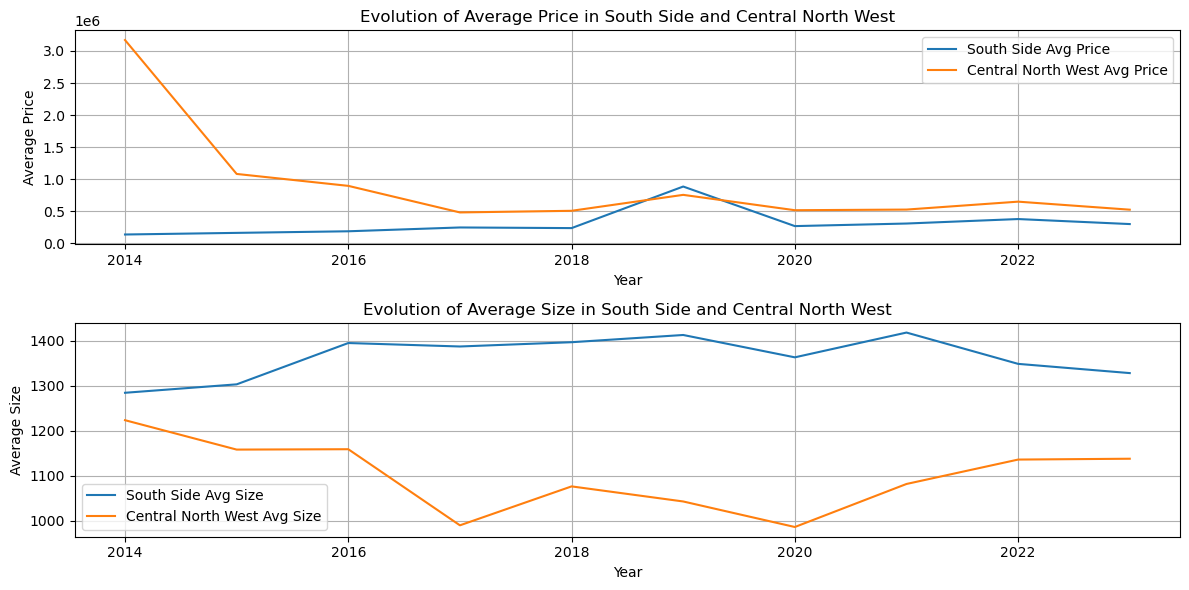

In [33]:

property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'], errors='coerce')

south_side_data = property_df[(property_df['last_sold_date'].dt.year >= 2014) & (property_df['last_sold_date'].dt.year <= 2023) & (property_df['community'].isin(south_side))]
central_north_west_data = property_df[(property_df['last_sold_date'].dt.year >= 2014) & (property_df['last_sold_date'].dt.year <= 2023) & (property_df['community'].isin(central_north_west))]

south_side_avg_data = south_side_data.groupby(south_side_data['last_sold_date'].dt.year).agg({'sold_price': 'mean', 'sqft': 'mean'}).reset_index()
central_north_west_avg_data = central_north_west_data.groupby(central_north_west_data['last_sold_date'].dt.year).agg({'sold_price': 'mean', 'sqft': 'mean'}).reset_index()

south_side_avg_data.columns = ['Year', 'Avg_Price', 'Avg_Size']
central_north_west_avg_data.columns = ['Year', 'Avg_Price', 'Avg_Size']

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(south_side_avg_data['Year'], south_side_avg_data['Avg_Price'], label='South Side Avg Price')
plt.plot(central_north_west_avg_data['Year'], central_north_west_avg_data['Avg_Price'], label='Central North West Avg Price')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Evolution of Average Price in South Side and Central North West')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(south_side_avg_data['Year'], south_side_avg_data['Avg_Size'], label='South Side Avg Size')
plt.plot(central_north_west_avg_data['Year'], central_north_west_avg_data['Avg_Size'], label='Central North West Avg Size')
plt.xlabel('Year')
plt.ylabel('Average Size')
plt.title('Evolution of Average Size in South Side and Central North West')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


#### Change in avg price by neighborhood group

/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_97300/50985777.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Year'] = group_data['last_sold_date'].dt.year
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_97300/50985777.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Year'] = group_data['last_sold_date'].dt.year
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_97300/50985777.py:45: SettingWithCopyWarning: 
A value is trying to be set on a cop

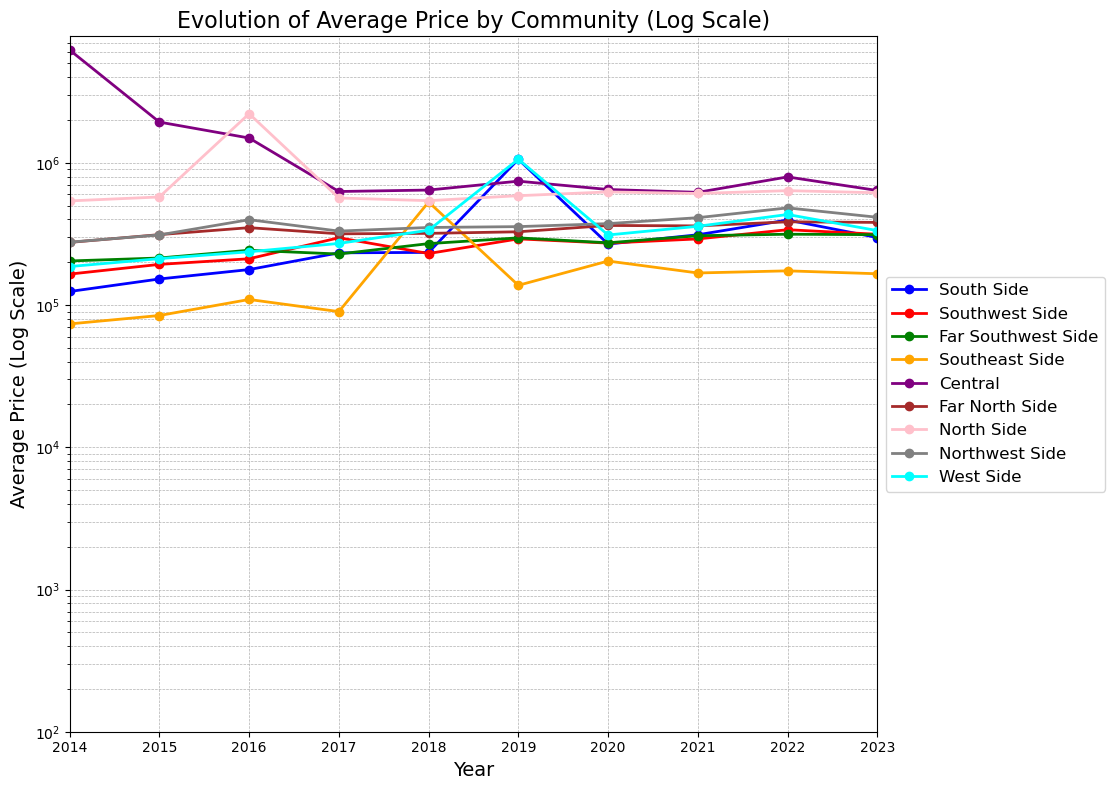

In [47]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'], errors='coerce')

neighborhood_groups = {
    'South Side': {'neighborhoods': south_side_neighborhoods, 'color': 'blue'},
    'Southwest Side': {'neighborhoods': southwest_side_neighborhoods, 'color': 'red'},
    'Far Southwest Side': {'neighborhoods': far_southwest_side_neighborhoods, 'color': 'green'},
    'Southeast Side': {'neighborhoods': southeast_side_neighborhoods, 'color': 'orange'},
    'Central': {'neighborhoods': central, 'color': 'purple'},
    'Far North Side': {'neighborhoods': far_north_side, 'color': 'brown'},
    'North Side': {'neighborhoods': north_side, 'color': 'pink'},
    'Northwest Side': {'neighborhoods': northwest_side, 'color': 'gray'},
    'West Side': {'neighborhoods': west_side, 'color': 'cyan'}
}

fig_price, axs_price = plt.subplots(figsize=(15, 8))

axs_price.set_yscale('log')

color_counter = 0

for group_name, group_info in neighborhood_groups.items():
    neighborhoods = group_info['neighborhoods']
    color = group_info.get('color', 'blue')  
    
    group_data = property_df[
        (property_df['last_sold_date'].dt.year >= 2014) &
        (property_df['last_sold_date'].dt.year <= 2023) &
        (property_df['community'].isin(neighborhoods))
    ]

    group_data['Year'] = group_data['last_sold_date'].dt.year

    avg_data = group_data.groupby('Year').agg({'sold_price': 'mean'}).reset_index()

    axs_price.plot(
        avg_data['Year'], avg_data['sold_price'],
        label=f'{group_name}', color=color, linewidth=2, marker='o'
    )

axs_price.set_xlim(2014, 2023)
axs_price.set_ylim(bottom=100)

axs_price.set_xlabel('Year', fontsize=14)
axs_price.set_ylabel('Average Price (Log Scale)', fontsize=14)
axs_price.set_title('Evolution of Average Price by Community (Log Scale)', fontsize=16)

axs_price.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

axs_price.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.tight_layout(rect=[0, 0, 0.75, 1])

plt.show()


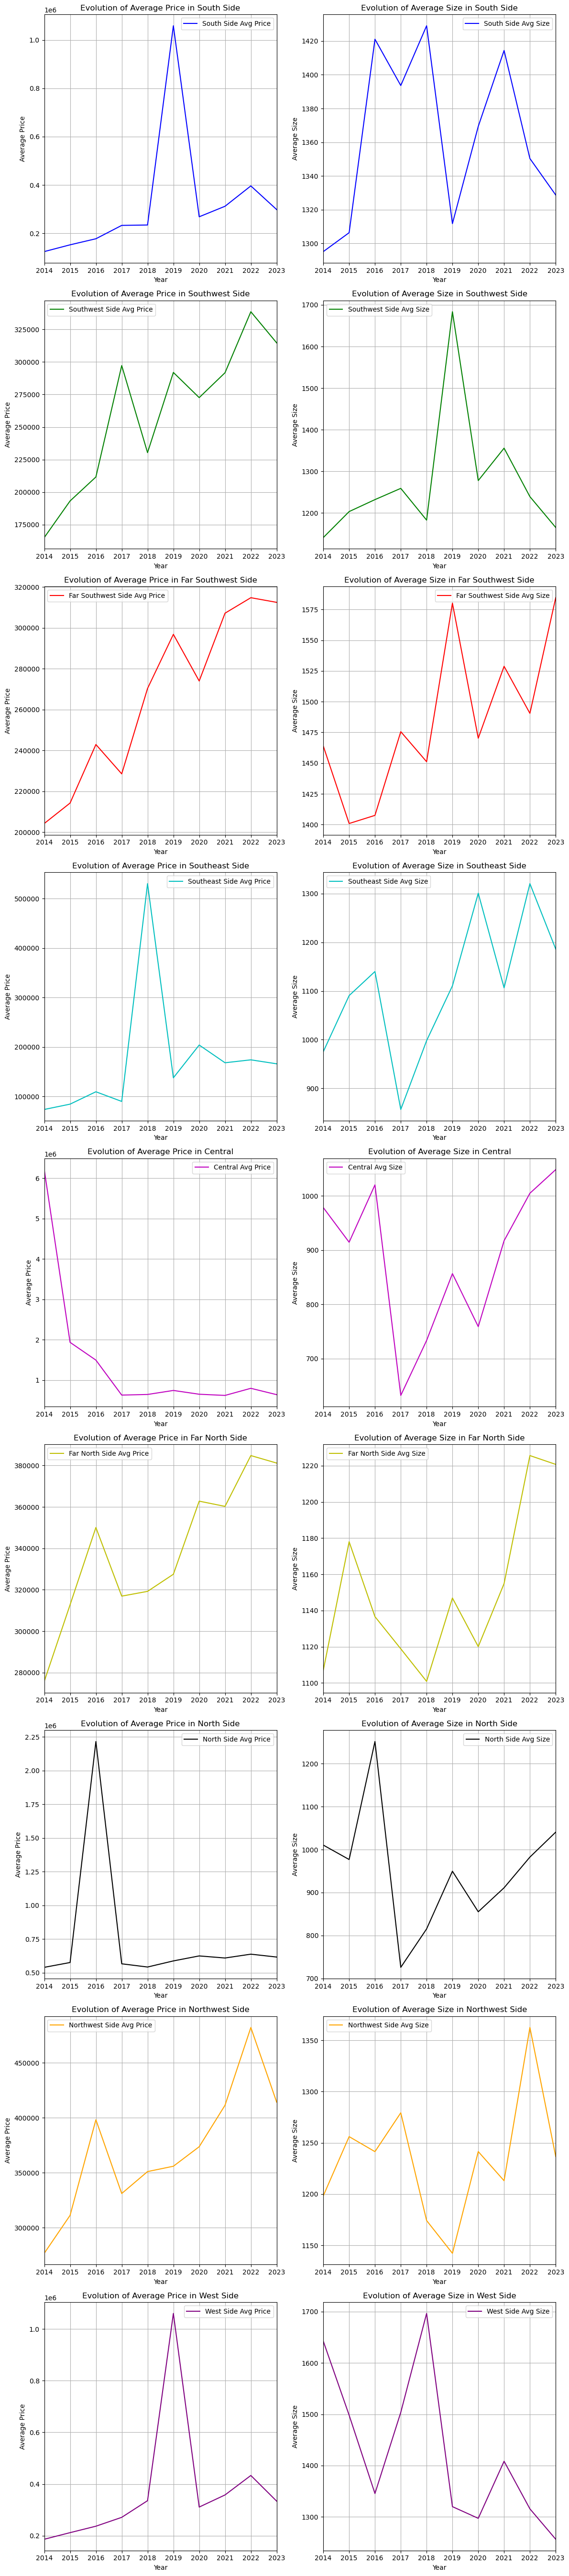

In [ ]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'], errors='coerce')

fig, axs = plt.subplots(len(neighborhood_groups), 2, figsize=(12, 6 * len(neighborhood_groups)))

for i, (group_name, group_info) in enumerate(neighborhood_groups.items()):
    neighborhoods = group_info['neighborhoods']
    color = group_info['color']

    group_data = property_df[
        (property_df['last_sold_date'].dt.year >= 2014) &
        (property_df['last_sold_date'].dt.year <= 2023) &
        (property_df['community'].isin(neighborhoods))
    ]

    avg_data = group_data.groupby(group_data['last_sold_date'].dt.year).agg({'sold_price': 'mean', 'sqft': 'mean'}).reset_index()

    avg_data.columns = ['Year', 'Avg_Price', 'Avg_Size']

    axs[i, 0].plot(avg_data['Year'], avg_data['Avg_Price'], label=f'{group_name} Avg Price', color=color)
    axs[i, 0].set_xlabel('Year')
    axs[i, 0].set_ylabel('Average Price')
    axs[i, 0].set_title(f'Evolution of Average Price in {group_name}')
    axs[i, 0].legend()
    axs[i, 0].grid()

    axs[i, 1].plot(avg_data['Year'], avg_data['Avg_Size'], label=f'{group_name} Avg Size', color=color)
    axs[i, 1].set_xlabel('Year')
    axs[i, 1].set_ylabel('Average Size')
    axs[i, 1].set_title(f'Evolution of Average Size in {group_name}')
    axs[i, 1].legend()
    axs[i, 1].grid()

    axs[i, 0].set_xlim(2014, 2023)
    axs[i, 1].set_xlim(2014, 2023)

plt.tight_layout()
plt.show()


#### Neighborhoods with highest avg sold price

In [ ]:
neighborhoods_average_sold_price = property_df.groupby('community')['sold_price'].mean().sort_values(ascending=False)

neighborhoods_average_sold_price.head()


community
DOUGLAS            4.069611e+06
NEAR NORTH SIDE    2.319013e+06
LOOP               2.025970e+06
LINCOLN PARK       1.361900e+06
NEAR SOUTH SIDE    1.329215e+06
Name: sold_price, dtype: float64

# Property Feature Analysis

#### Price differences in 1,2,3 BR across all property styles in each neighborhood group

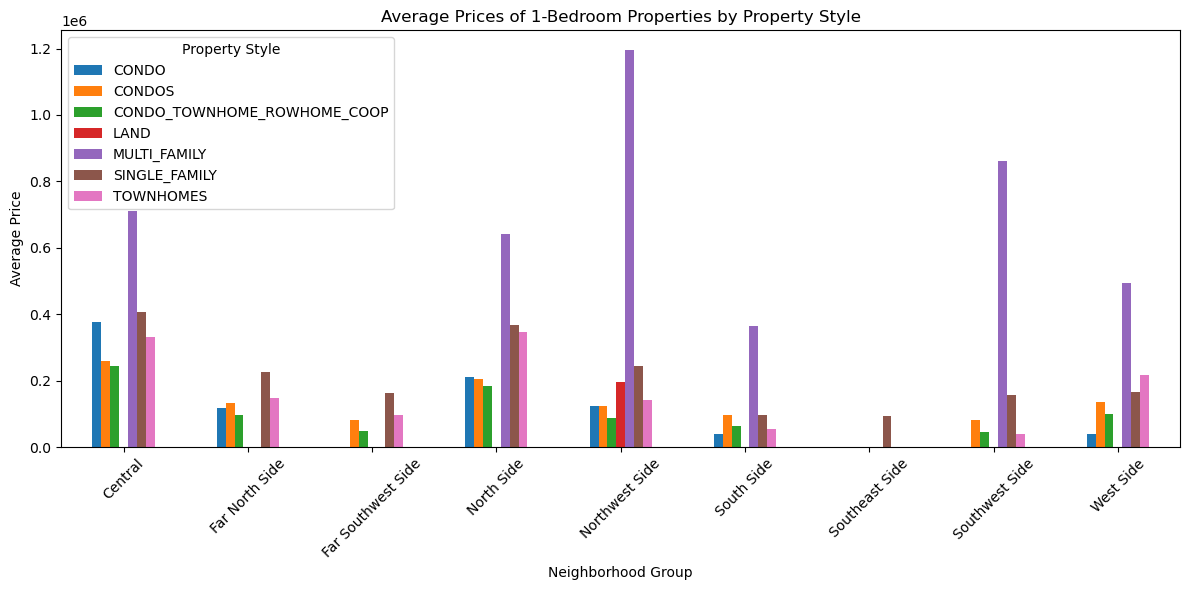

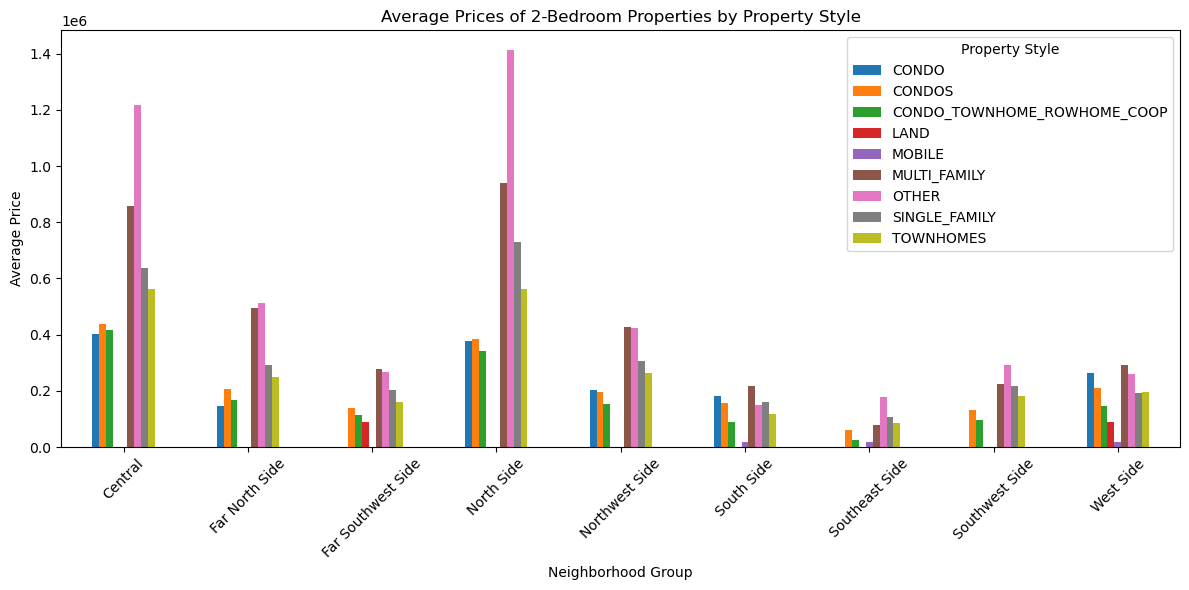

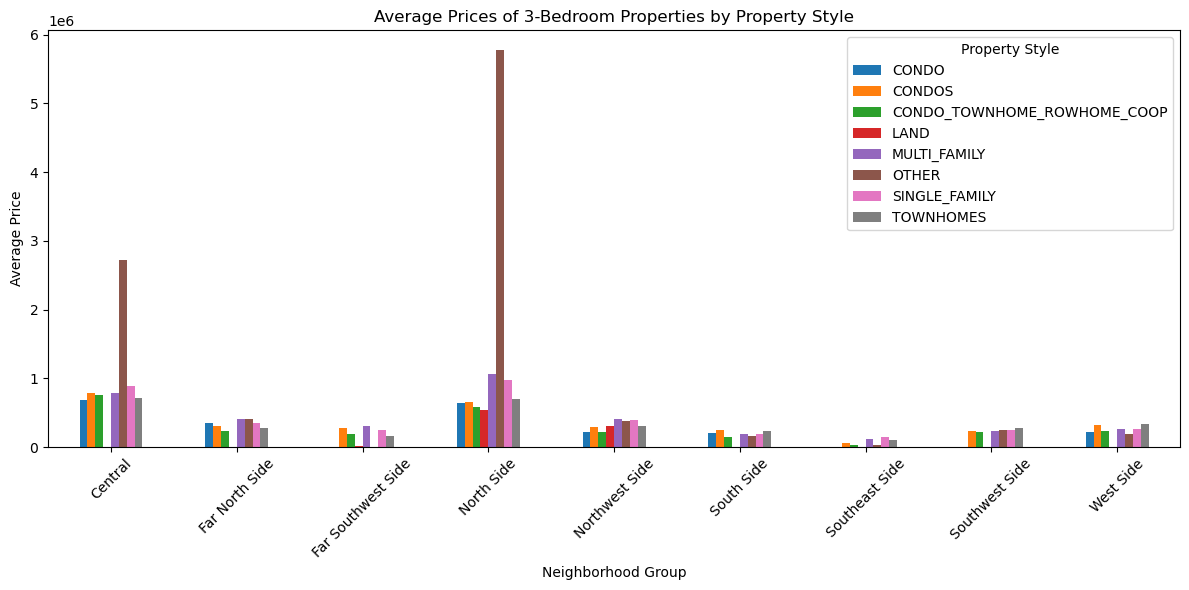

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to analyze property prices based on bedroom count
def analyze_property_prices(property_df, neighborhood_groups, bedroom_count):
    # Create an empty list to store the results
    results = []

    # Iterate through each neighborhood group and analyze property prices
    for group_name, group_info in neighborhood_groups.items():
        neighborhoods = group_info['neighborhoods']

        # Filter for properties with the specified bedroom count in the current neighborhood group
        bedroom_df = property_df[(property_df['beds'] == bedroom_count) & (property_df['community'].isin(neighborhoods))]

        # Group by property style and calculate the mean price
        result = bedroom_df.groupby('style')['sold_price'].mean().reset_index()

        # Add the neighborhood group as a column in the result
        result['neighborhood_group'] = group_name

        # Append the result to the list of results
        results.append(result)

    # Combine the results into a single DataFrame
    result_df = pd.concat(results)

    # Pivot the DataFrame to have property styles as columns
    result_pivot = result_df.pivot(index='neighborhood_group', columns='style', values='sold_price')

    # Fill NaN values with 0 (or any other desired value)
    result_pivot.fillna(0, inplace=True)

    return result_pivot

# Bedroom counts to analyze (1 BR, 2 BR, and 3 BR)
bedroom_counts = [1, 2, 3]

# Analyze property prices for each bedroom count and visualize the data
for bedroom_count in bedroom_counts:
    result_pivot = analyze_property_prices(property_df, neighborhood_groups, bedroom_count)


    # Visualize the data as a bar chart
    result_pivot.plot(kind='bar', figsize=(12, 6))
    plt.title(f"Average Prices of {bedroom_count}-Bedroom Properties by Property Style")
    plt.xlabel("Neighborhood Group")
    plt.ylabel("Average Price")
    plt.legend(title="Property Style")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Seasonal Trends

#### Average Days on Market for each neighborhood group over the years

/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_97300/2754318880.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Year'] = group_data['last_sold_date'].dt.year
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_97300/2754318880.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Year'] = group_data['last_sold_date'].dt.year
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_97300/2754318880.py:26: SettingWithCopyWarning: 
A value is trying to be set on

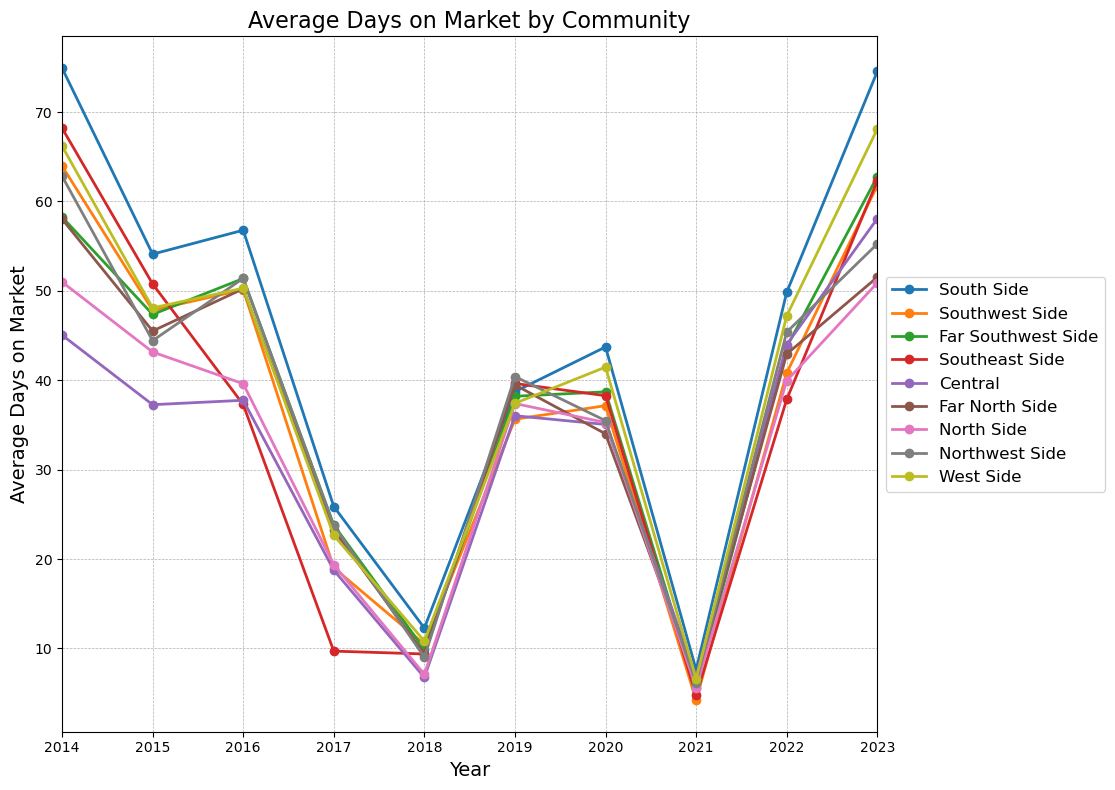

In [72]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'], errors='coerce')

neighborhood_groups = {
    'South Side': {'neighborhoods': south_side_neighborhoods},
    'Southwest Side': {'neighborhoods': southwest_side_neighborhoods},
    'Far Southwest Side': {'neighborhoods': far_southwest_side_neighborhoods},
    'Southeast Side': {'neighborhoods': southeast_side_neighborhoods},
    'Central': {'neighborhoods': central},
    'Far North Side': {'neighborhoods': far_north_side},
    'North Side': {'neighborhoods': north_side},
    'Northwest Side': {'neighborhoods': northwest_side},
    'West Side': {'neighborhoods': west_side}
}

fig_dom, axs_dom = plt.subplots(figsize=(15, 8))

for group_name, group_info in neighborhood_groups.items():
    neighborhoods = group_info['neighborhoods']

    group_data = property_df[
        (property_df['last_sold_date'].dt.year >= 2014) &
        (property_df['last_sold_date'].dt.year <= 2023) &
        (property_df['community'].isin(neighborhoods))
    ]

    group_data['Year'] = group_data['last_sold_date'].dt.year

    avg_dom_data = group_data.groupby('Year').agg({'days_on_mls': 'mean'}).reset_index()

    axs_dom.plot(
        avg_dom_data['Year'], avg_dom_data['days_on_mls'],
        label=f'{group_name}', linewidth=2, marker='o'
    )

axs_dom.set_xlim(2014, 2023)

axs_dom.set_xlabel('Year', fontsize=14)
axs_dom.set_ylabel('Average Days on Market', fontsize=14)
axs_dom.set_title('Average Days on Market by Community', fontsize=16)

axs_dom.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

axs_dom.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.tight_layout(rect=[0, 0, 0.75, 1])

plt.show()
